### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from sklearn.linear_model import LinearRegression
import itertools
import numpy as np
from scipy.optimize import minimize
warnings.filterwarnings('ignore')

### Loading the cleaned dataset

In [2]:
directory = os.listdir('../data/cleanData/')
directory = [x for x in directory if x.find(".csv")!=-1]

In [3]:
# dictionary to store the players behaviour model with their names

player_shooting_behaviour = {}

### Plotting of the players True Shooting Accuracy with the % of overall shots taken

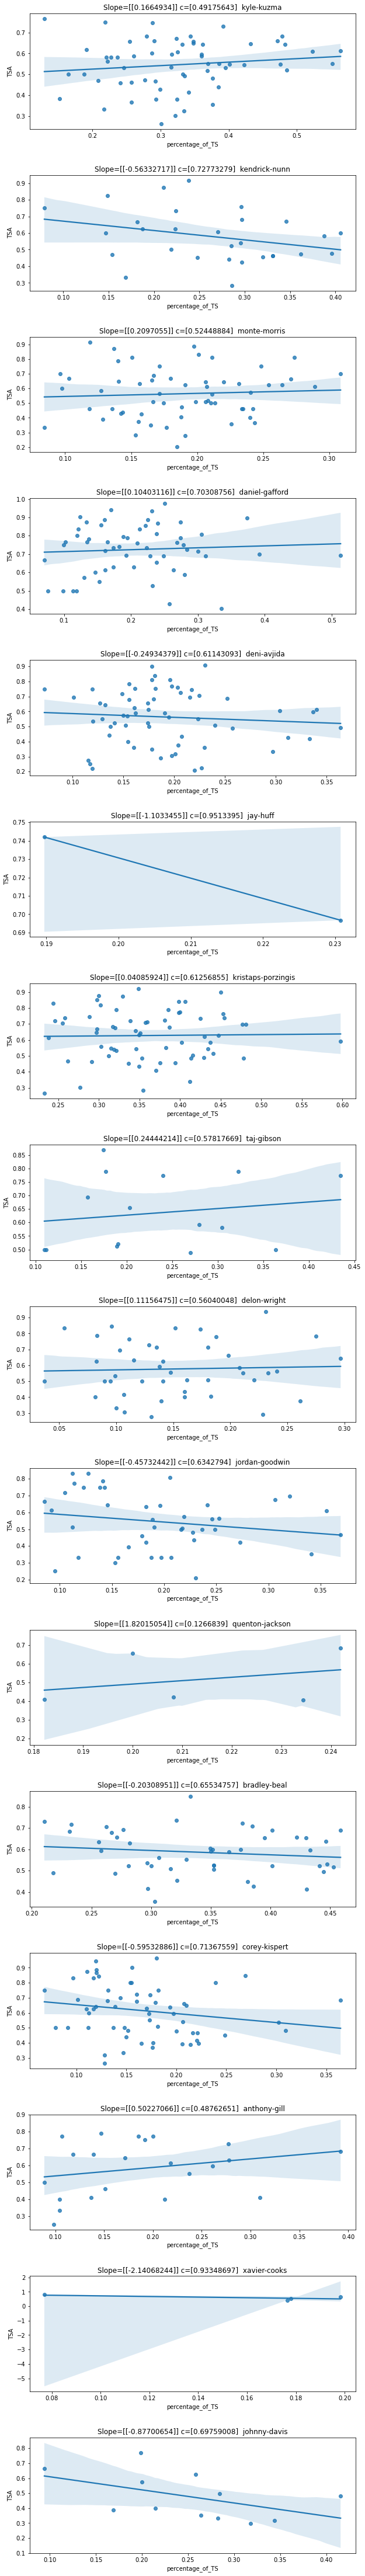

In [4]:
plot_count = 0
fig, axes = plt.subplots(nrows=len(directory), ncols=1, figsize=(10, 80))
for i in range(len(directory)):
    if directory[i].find('csv') == -1:
        continue
        
    # getting the data of each player and modelling their shooting behaviour
    data = pd.read_csv("../data/cleanData/" + directory[i], header=0)
    data = data[['percentage_of_TS', 'TSA','GS']].dropna()
    
    # regression model for shooting accuracy behaviour model
    linReg = LinearRegression()
    linReg.fit(np.array(data.percentage_of_TS).reshape(-1,1), np.array(data.TSA).reshape(-1,1))
    
    if (data['GS'].sum() > 0):
        player_shooting_behaviour[(linReg.coef_[0][0], linReg.intercept_[0])] = directory[i].replace('-clean.csv','')
    
    sns.regplot(x=data.percentage_of_TS, y=data.TSA, ax=axes[plot_count])
    axes[plot_count].set_title("Slope=" + str(linReg.coef_) + " c=" + str(linReg.intercept_) + "  " + directory[i].replace('-clean.csv',''))
    plot_count+=1
    
plt.subplots_adjust(hspace=0.4)
plt.show()

### Data about players and model of their shooting accuracy behaviour

In [5]:
sorted_player_shooting_behaviour = dict(sorted(player_shooting_behaviour.items(), reverse=True))
sorted_player_shooting_behaviour

{(0.5022706594236063, 0.4876265087131789): 'anthony-gill',
 (0.2444421394296493, 0.5781766878385223): 'taj-gibson',
 (0.20970549633384283, 0.5244888393433912): 'monte-morris',
 (0.1664933975317767, 0.4917564290684223): 'kyle-kuzma',
 (0.11156474949630242, 0.5604004788035355): 'delon-wright',
 (0.10403116047395491, 0.7030875590012093): 'daniel-gafford',
 (0.04085924440005604, 0.6125685521532808): 'kristaps-porzingis',
 (-0.20308951183896198, 0.6553475654609318): 'bradley-beal',
 (-0.24934378818880346, 0.6114309287031514): 'deni-avjida',
 (-0.4573244151076455, 0.634279402249545): 'jordan-goodwin',
 (-0.5633271653712212, 0.7277327879734652): 'kendrick-nunn',
 (-0.595328857830382, 0.7136755922768923): 'corey-kispert',
 (-0.877006544539654, 0.6975900831815671): 'johnny-davis',
 (-2.1406824417088566, 0.9334869737843708): 'xavier-cooks'}

In [6]:
all_player_names_sorted_by_shooting_accuracy = list(sorted_player_shooting_behaviour.values())
all_player_names_sorted_by_shooting_accuracy

['anthony-gill',
 'taj-gibson',
 'monte-morris',
 'kyle-kuzma',
 'delon-wright',
 'daniel-gafford',
 'kristaps-porzingis',
 'bradley-beal',
 'deni-avjida',
 'jordan-goodwin',
 'kendrick-nunn',
 'corey-kispert',
 'johnny-davis',
 'xavier-cooks']

In [7]:
all_player_model_by_shooting_accuracy = list(sorted_player_shooting_behaviour.keys())
all_player_model_by_shooting_accuracy

[(0.5022706594236063, 0.4876265087131789),
 (0.2444421394296493, 0.5781766878385223),
 (0.20970549633384283, 0.5244888393433912),
 (0.1664933975317767, 0.4917564290684223),
 (0.11156474949630242, 0.5604004788035355),
 (0.10403116047395491, 0.7030875590012093),
 (0.04085924440005604, 0.6125685521532808),
 (-0.20308951183896198, 0.6553475654609318),
 (-0.24934378818880346, 0.6114309287031514),
 (-0.4573244151076455, 0.634279402249545),
 (-0.5633271653712212, 0.7277327879734652),
 (-0.595328857830382, 0.7136755922768923),
 (-0.877006544539654, 0.6975900831815671),
 (-2.1406824417088566, 0.9334869737843708)]

# Global optimum shooting strategy based on modelling of players TSA on % of total shots taken

We have already calculated the TSA (True shooting accuracy) of each player. We have modeled their TSA with respect to percent of team shots they took. To calculate the overall utility by each player we use the formula

utility(i) = x*(player_model)

In [8]:

# objective function to be maximized
def objective(x):
    f = 0
    f += x[0]*(slope1*x[0] + intercept1)
    f += x[1]*(slope2*x[1] + intercept2)
    f += x[2]*(slope3*x[2] + intercept3)
    f += x[3]*(slope4*x[3] + intercept4)
    f += x[4]*(slope5*x[4] + intercept5)
    return -f

# constraint functions

# 1. Every players shooting % contribution should be between 0.01 to 0.40 (got these values from past behaviour)
# 2. The utility contribution by each player should be positive.
# 3. The sum of individual player contribution should be equal to 1.

def constraint1(x):
    return x[0] + x[1] + x[2] + x[3] + x[4] - 1

def constraint2(x):
    return x[0] - 0.01
def constraint3(x):
    return x[1] - 0.01
def constraint4(x):
    return x[2] - 0.01
def constraint5(x):
    return x[3] - 0.01
def constraint6(x):
    return x[4] - 0.01
def constraint7(x):
    return (slope1*x[0] + intercept1)
def constraint8(x):
    return (slope2*x[1] + intercept2)
def constraint9(x):
    return (slope3*x[2] + intercept3)
def constraint10(x):
    return (slope4*x[3] + intercept4)
def constraint11(x):
    return (slope5*x[4] + intercept5)
def constraint12(x):
    return (0.40 - x[0])
def constraint13(x):
    return (0.40 - x[1])
def constraint14(x):
    return (0.40 - x[2])
def constraint15(x):
    return (0.40 - x[3])
def constraint16(x):
    return (0.40 - x[4])

# Define the initial guess
x0 = [0.2, 0.2, 0.2, 0.2, 0.2]

# Define the bounds of the variables
bounds = [(0, 1), (0, 1), (0, 1), (0, 1), (0, 1)]

# Define the constraints
cons = [{'type': 'eq', 'fun': constraint1}]
cons.append({'type': 'ineq', 'fun': constraint2})
cons.append({'type': 'ineq', 'fun': constraint3})
cons.append({'type': 'ineq', 'fun': constraint4})
cons.append({'type': 'ineq', 'fun': constraint5})
cons.append({'type': 'ineq', 'fun': constraint6})
cons.append({'type': 'ineq', 'fun': constraint7})
cons.append({'type': 'ineq', 'fun': constraint8})
cons.append({'type': 'ineq', 'fun': constraint9})
cons.append({'type': 'ineq', 'fun': constraint10})
cons.append({'type': 'ineq', 'fun': constraint11})
cons.append({'type': 'ineq', 'fun': constraint12})
cons.append({'type': 'ineq', 'fun': constraint13})
cons.append({'type': 'ineq', 'fun': constraint14})
cons.append({'type': 'ineq', 'fun': constraint15})
cons.append({'type': 'ineq', 'fun': constraint16})

# # Use the minimize function to find the maximum
# # res = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=cons)
# res = minimize(objective, x0, method='nelder-mead', bounds=bounds, constraints=cons)


In [9]:
# storing each players behaviour to apply to the objective function above

slope1 = 0
intercept1 = 0
slope2 = 0
intercept2 = 0
slope3 = 0
intercept3 = 0
slope4 = 0
intercept4 = 0
slope5 = 0
intercept5 = 0
max_utility_for_max_score = -10000000
players_id = None
shooting_percentage_distribution = None
for i in range(len(all_player_names_sorted_by_shooting_accuracy)):
    for j in range(i+1, len(all_player_names_sorted_by_shooting_accuracy)):
        for k in range(j+1, len(all_player_names_sorted_by_shooting_accuracy)):
            for l in range(k+1, len(all_player_names_sorted_by_shooting_accuracy)):
                for m in range(l+1, len(all_player_names_sorted_by_shooting_accuracy)):
                    slope1 = all_player_model_by_shooting_accuracy[i][0]
                    intercept1 = all_player_model_by_shooting_accuracy[i][1]
                    slope2 = all_player_model_by_shooting_accuracy[j][0]
                    intercept2 = all_player_model_by_shooting_accuracy[j][1]
                    slope3 = all_player_model_by_shooting_accuracy[k][0]
                    intercept3 = all_player_model_by_shooting_accuracy[k][1]
                    slope4 = all_player_model_by_shooting_accuracy[l][0]
                    intercept4 = all_player_model_by_shooting_accuracy[l][1]
                    slope5 = all_player_model_by_shooting_accuracy[m][0]
                    intercept5 = all_player_model_by_shooting_accuracy[m][1]
                    print("Starting for players: " + str(i) + " " + str(j) + " " + str(k) + " " + str(l) + " " + str(m))
                    res = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=cons)
                    if -res.fun > max_utility_for_max_score:
                        max_utility_for_max_score = -res.fun
                        players_id = [i,j,k,l,m]
                        shooting_percentage_distribution = res.x
                    print("Shooting distribution:", res.x)
                    print("\n")

Starting for players: 0 1 2 3 4
Shooting distribution: [0.4  0.4  0.01 0.01 0.18]


Starting for players: 0 1 2 3 5
Shooting distribution: [0.4  0.18 0.01 0.01 0.4 ]


Starting for players: 0 1 2 3 6
Shooting distribution: [0.4  0.4  0.01 0.01 0.18]


Starting for players: 0 1 2 3 7
Shooting distribution: [0.4  0.4  0.01 0.01 0.18]


Starting for players: 0 1 2 3 8
Shooting distribution: [0.4        0.4        0.09849765 0.01       0.09150235]


Starting for players: 0 1 2 3 9
Shooting distribution: [0.4        0.4        0.12921616 0.01       0.06078384]


Starting for players: 0 1 2 3 10
Shooting distribution: [0.4        0.4        0.01529939 0.01       0.17470061]


Starting for players: 0 1 2 3 11
Shooting distribution: [0.4        0.4        0.04802381 0.01       0.14197619]


Starting for players: 0 1 2 3 12
Shooting distribution: [0.4        0.4        0.12000677 0.01       0.06999323]


Starting for players: 0 1 2 3 13
Shooting distribution: [0.4        0.4        0.10472969 0

Shooting distribution: [0.4        0.4        0.01       0.15324614 0.03675386]


Starting for players: 0 1 3 7 9
Shooting distribution: [0.4        0.4        0.01       0.14752222 0.04247778]


Starting for players: 0 1 3 7 10
Shooting distribution: [0.4        0.4        0.01       0.09242954 0.09757046]


Starting for players: 0 1 3 7 11
Shooting distribution: [0.4        0.4        0.01       0.10514348 0.08485652]


Starting for players: 0 1 3 7 12
Shooting distribution: [0.4        0.4        0.01       0.13471949 0.05528051]


Starting for players: 0 1 3 7 13
Shooting distribution: [0.4        0.4        0.01       0.11420052 0.07579948]


Starting for players: 0 1 3 8 9
Shooting distribution: [0.4        0.4        0.01       0.10679326 0.08320674]


Starting for players: 0 1 3 8 10
Shooting distribution: [0.4        0.4        0.01       0.06014888 0.12985112]


Starting for players: 0 1 3 8 11
Shooting distribution: [0.4        0.4        0.01       0.07338955 0.11661045]




Shooting distribution: [0.4        0.12928114 0.4        0.01       0.06071886]


Starting for players: 0 1 5 9 12
Shooting distribution: [0.4        0.16903347 0.4        0.01       0.02096653]


Starting for players: 0 1 5 9 13
Shooting distribution: [0.4        0.12080459 0.4        0.01       0.06919541]


Starting for players: 0 1 5 10 11
Shooting distribution: [0.4        0.01       0.4        0.10357115 0.08642885]


Starting for players: 0 1 5 10 12
Shooting distribution: [0.4        0.01       0.4        0.12615312 0.06384688]


Starting for players: 0 1 5 10 13
Shooting distribution: [0.4        0.01       0.4        0.11237112 0.07762888]


Starting for players: 0 1 5 11 12
Shooting distribution: [0.4        0.05802252 0.4        0.09004625 0.05193123]


Starting for players: 0 1 5 11 13
Shooting distribution: [0.4        0.01       0.4        0.10870008 0.08129992]


Starting for players: 0 1 5 12 13
Shooting distribution: [0.4        0.08037141 0.4        0.04580357 0.0738

Shooting distribution: [0.4        0.4        0.01       0.10851339 0.08148661]


Starting for players: 0 2 3 5 6
Shooting distribution: [0.4  0.01 0.01 0.4  0.18]


Starting for players: 0 2 3 5 7
Shooting distribution: [0.4  0.01 0.01 0.4  0.18]


Starting for players: 0 2 3 5 8
Shooting distribution: [0.4        0.09849799 0.01       0.4        0.09150201]


Starting for players: 0 2 3 5 9
Shooting distribution: [0.4        0.12921616 0.01       0.4        0.06078384]


Starting for players: 0 2 3 5 10
Shooting distribution: [0.4        0.01529937 0.01       0.4        0.17470063]


Starting for players: 0 2 3 5 11
Shooting distribution: [0.4        0.04802386 0.01       0.4        0.14197614]


Starting for players: 0 2 3 5 12
Shooting distribution: [0.4        0.12000674 0.01       0.4        0.06999326]


Starting for players: 0 2 3 5 13
Shooting distribution: [0.4        0.10472969 0.01       0.4        0.08527031]


Starting for players: 0 2 3 6 7
Shooting distribution: [0.4  0

Shooting distribution: [0.4        0.01       0.4        0.11282669 0.07717331]


Starting for players: 0 2 5 6 12
Shooting distribution: [0.4        0.01       0.4        0.14865966 0.04134034]


Starting for players: 0 2 5 6 13
Shooting distribution: [0.4        0.01       0.4        0.11728153 0.07271847]


Starting for players: 0 2 5 7 8
Shooting distribution: [0.4        0.01       0.4        0.15324614 0.03675386]


Starting for players: 0 2 5 7 9
Shooting distribution: [0.4        0.01       0.4        0.14752221 0.04247779]


Starting for players: 0 2 5 7 10
Shooting distribution: [0.4        0.01       0.4        0.09242957 0.09757043]


Starting for players: 0 2 5 7 11
Shooting distribution: [0.4        0.01       0.4        0.10514349 0.08485651]


Starting for players: 0 2 5 7 12
Shooting distribution: [0.4        0.01       0.4        0.13436248 0.05563752]


Starting for players: 0 2 5 7 13
Shooting distribution: [0.4        0.01       0.4        0.11420052 0.07579948]




Shooting distribution: [0.4        0.4        0.04245194 0.09931524 0.05823282]


Starting for players: 0 2 9 11 13
Shooting distribution: [0.4        0.4        0.03210372 0.09131945 0.07657683]


Starting for players: 0 2 9 12 13
Shooting distribution: [0.4        0.4        0.05419298 0.06435711 0.08144991]


Starting for players: 0 2 10 11 12
Shooting distribution: [0.4        0.4        0.08877471 0.07181049 0.0394148 ]


Starting for players: 0 2 10 11 13
Shooting distribution: [0.4        0.4        0.07406507 0.05839232 0.06754262]


Starting for players: 0 2 10 12 13
Shooting distribution: [0.4        0.4        0.08870195 0.03979428 0.07150378]


Starting for players: 0 2 11 12 13
Shooting distribution: [0.4        0.4        0.08059235 0.04554731 0.07386034]


Starting for players: 0 3 4 5 6
Shooting distribution: [0.4  0.01 0.01 0.4  0.18]


Starting for players: 0 3 4 5 7
Shooting distribution: [0.4  0.01 0.01 0.4  0.18]


Starting for players: 0 3 4 5 8
Shooting distribut

Shooting distribution: [0.4        0.01       0.4        0.07338956 0.11661044]


Starting for players: 0 3 6 8 12
Shooting distribution: [0.4        0.01       0.4        0.10969204 0.08030796]


Starting for players: 0 3 6 8 13
Shooting distribution: [0.4        0.01       0.4        0.10280291 0.08719709]


Starting for players: 0 3 6 9 10
Shooting distribution: [0.4        0.01       0.4        0.05908527 0.13091473]


Starting for players: 0 3 6 9 11
Shooting distribution: [0.4        0.01       0.4        0.06974223 0.12025777]


Starting for players: 0 3 6 9 12
Shooting distribution: [0.4        0.01       0.4        0.10115624 0.08884376]


Starting for players: 0 3 6 9 13
Shooting distribution: [0.4       0.01      0.4       0.0989687 0.0910313]


Starting for players: 0 3 6 10 11
Shooting distribution: [0.4        0.01       0.4        0.10422887 0.08577113]


Starting for players: 0 3 6 10 12
Shooting distribution: [0.4        0.01       0.4        0.12615313 0.06384687]


S

Shooting distribution: [0.4        0.01       0.4        0.10848785 0.08151215]


Starting for players: 0 4 5 12 13
Shooting distribution: [0.4        0.04221323 0.4        0.07284482 0.08494195]


Starting for players: 0 4 6 7 8
Shooting distribution: [0.4       0.01      0.4       0.1532461 0.0367539]


Starting for players: 0 4 6 7 9
Shooting distribution: [0.4       0.01      0.4       0.1475222 0.0424778]


Starting for players: 0 4 6 7 10
Shooting distribution: [0.4        0.01       0.4        0.09242956 0.09757044]


Starting for players: 0 4 6 7 11
Shooting distribution: [0.4        0.01       0.4        0.10496332 0.08503668]


Starting for players: 0 4 6 7 12
Shooting distribution: [0.4        0.01       0.4        0.13467139 0.05532861]


Starting for players: 0 4 6 7 13
Shooting distribution: [0.4        0.01       0.4        0.11420052 0.07579948]


Starting for players: 0 4 6 8 9
Shooting distribution: [0.4        0.05422488 0.4        0.07814209 0.06763303]


Starting f

Shooting distribution: [0.4        0.4        0.05565354 0.09830119 0.04604527]


Starting for players: 0 5 6 10 13
Shooting distribution: [0.4        0.4        0.02443442 0.10088718 0.07467841]


Starting for players: 0 5 6 11 12
Shooting distribution: [0.4        0.4        0.07523865 0.07977328 0.04498807]


Starting for players: 0 5 6 11 13
Shooting distribution: [0.4        0.4        0.04362318 0.08216977 0.07420705]


Starting for players: 0 5 6 12 13
Shooting distribution: [0.4        0.4        0.08157313 0.04497817 0.07344869]


Starting for players: 0 5 7 8 9
Shooting distribution: [0.4        0.4        0.13888886 0.02291551 0.03819563]


Starting for players: 0 5 7 8 10
Shooting distribution: [0.4        0.4        0.09242956 0.01       0.09757044]


Starting for players: 0 5 7 8 11
Shooting distribution: [0.4        0.4        0.10514347 0.01       0.08485653]


Starting for players: 0 5 7 8 12
Shooting distribution: [0.4        0.4        0.12901378 0.01702    0.0539662

Shooting distribution: [0.4        0.4        0.08835836 0.03987847 0.07176317]


Starting for players: 0 6 11 12 13
Shooting distribution: [0.4        0.4        0.08053402 0.045556   0.07390998]


Starting for players: 0 7 8 9 10
Shooting distribution: [0.4        0.24673317 0.11293312 0.0869086  0.15342512]


Starting for players: 0 7 8 9 11
Shooting distribution: [0.4        0.25373712 0.11937618 0.0904008  0.13648591]


Starting for players: 0 7 8 9 12
Shooting distribution: [0.4        0.27592073 0.13653299 0.09964819 0.08789809]


Starting for players: 0 7 8 9 13
Shooting distribution: [0.4        0.27356633 0.13607615 0.09923726 0.09112026]


Starting for players: 0 7 8 10 11
Shooting distribution: [0.4        0.22830658 0.09795086 0.14672888 0.12701367]


Starting for players: 0 7 8 10 12
Shooting distribution: [0.4        0.24799403 0.11520935 0.15490053 0.08189609]


Starting for players: 0 7 8 10 13
Shooting distribution: [0.4        0.24586847 0.11273661 0.15291305 0.08848

Shooting distribution: [0.4        0.4        0.01       0.11863737 0.07136263]


Starting for players: 1 2 3 11 13
Shooting distribution: [0.4        0.4        0.01       0.10848785 0.08151215]


Starting for players: 1 2 3 12 13
Shooting distribution: [0.4        0.4        0.01       0.09569615 0.09430385]


Starting for players: 1 2 4 5 6
Shooting distribution: [0.4  0.01 0.01 0.4  0.18]


Starting for players: 1 2 4 5 7
Shooting distribution: [0.4  0.01 0.01 0.4  0.18]


Starting for players: 1 2 4 5 8
Shooting distribution: [0.4       0.01      0.1586606 0.4       0.0313394]


Starting for players: 1 2 4 5 9
Shooting distribution: [0.4        0.01       0.14447081 0.4        0.04552919]


Starting for players: 1 2 4 5 10
Shooting distribution: [0.4       0.01      0.0517219 0.4       0.1382781]


Starting for players: 1 2 4 5 11
Shooting distribution: [0.4       0.01      0.0748759 0.4       0.1151241]


Starting for players: 1 2 4 5 12
Shooting distribution: [0.4        0.01   

Shooting distribution: [0.4        0.01       0.4        0.05998322 0.13001678]


Starting for players: 1 2 6 8 11
Shooting distribution: [0.4        0.01       0.4        0.07338958 0.11661042]


Starting for players: 1 2 6 8 12
Shooting distribution: [0.4        0.01       0.4        0.10969205 0.08030795]


Starting for players: 1 2 6 8 13
Shooting distribution: [0.4        0.01       0.4        0.10280291 0.08719709]


Starting for players: 1 2 6 9 10
Shooting distribution: [0.4        0.01       0.4        0.05908526 0.13091474]


Starting for players: 1 2 6 9 11
Shooting distribution: [0.4        0.01       0.4        0.06974223 0.12025777]


Starting for players: 1 2 6 9 12
Shooting distribution: [0.4        0.26633374 0.2886505  0.01       0.03501576]


Starting for players: 1 2 6 9 13
Shooting distribution: [0.4        0.01       0.4        0.09873513 0.09126487]


Starting for players: 1 2 6 10 11
Shooting distribution: [0.4        0.01       0.4        0.10345506 0.08654494]

Shooting distribution: [0.4        0.01       0.4        0.10280291 0.08719709]


Starting for players: 1 3 4 9 10
Shooting distribution: [0.4        0.01       0.4        0.05908527 0.13091473]


Starting for players: 1 3 4 9 11
Shooting distribution: [0.4        0.01       0.4        0.06939728 0.12060272]


Starting for players: 1 3 4 9 12
Shooting distribution: [0.4        0.01       0.4        0.10115625 0.08884375]


Starting for players: 1 3 4 9 13
Shooting distribution: [0.4        0.01       0.4        0.09897045 0.09102955]


Starting for players: 1 3 4 10 11
Shooting distribution: [0.4      0.01     0.4      0.103653 0.086347]


Starting for players: 1 3 4 10 12
Shooting distribution: [0.4        0.01       0.4        0.12615312 0.06384688]


Starting for players: 1 3 4 10 13
Shooting distribution: [0.4        0.01       0.4        0.11206388 0.07793612]


Starting for players: 1 3 4 11 12
Shooting distribution: [0.4        0.01       0.4        0.11863737 0.07136263]


Star

Shooting distribution: [0.4        0.01       0.33125531 0.16201986 0.09672483]


Starting for players: 1 3 7 12 13
Shooting distribution: [0.4        0.23539697 0.20769455 0.0723486  0.08455988]


Starting for players: 1 3 8 9 10
Shooting distribution: [0.4        0.4        0.035719   0.04446813 0.11981287]


Starting for players: 1 3 8 9 11
Shooting distribution: [0.4        0.4        0.04519732 0.04962407 0.10517862]


Starting for players: 1 3 8 9 12
Shooting distribution: [0.4        0.4        0.06869821 0.06278736 0.06851443]


Starting for players: 1 3 8 9 13
Shooting distribution: [0.4        0.4        0.05977296 0.05805165 0.08217539]


Starting for players: 1 3 8 10 11
Shooting distribution: [0.4       0.4       0.01      0.1037358 0.0862642]


Starting for players: 1 3 8 10 12
Shooting distribution: [0.4        0.4        0.0275968  0.11543614 0.05696706]


Starting for players: 1 3 8 10 13
Shooting distribution: [0.4        0.4        0.01390392 0.10925569 0.07684038]



Shooting distribution: [0.4        0.4        0.10227823 0.0230835  0.07463828]


Starting for players: 1 4 7 10 11
Shooting distribution: [0.4        0.4        0.05087089 0.08274158 0.06638753]


Starting for players: 1 4 7 10 12
Shooting distribution: [0.4        0.4        0.070086   0.09014695 0.03976706]


Starting for players: 1 4 7 10 13
Shooting distribution: [0.4        0.4        0.04862649 0.0820389  0.06933461]


Starting for players: 1 4 7 11 12
Shooting distribution: [0.4        0.4        0.08067736 0.07705157 0.04227108]


Starting for players: 1 4 7 11 13
Shooting distribution: [0.4        0.4        0.05999072 0.06953259 0.0704767 ]


Starting for players: 1 4 7 12 13
Shooting distribution: [0.4        0.4        0.08364582 0.04345193 0.07290224]


Starting for players: 1 4 8 9 10
Shooting distribution: [0.4        0.4        0.0362985  0.0446642  0.11903729]


Starting for players: 1 4 8 9 11
Shooting distribution: [0.4        0.4        0.0454981  0.04983135 0.1046

Shooting distribution: [0.4        0.4        0.05419028 0.06435138 0.08145834]


Starting for players: 1 5 10 11 12
Shooting distribution: [0.4        0.4        0.08840869 0.07215877 0.03943254]


Starting for players: 1 5 10 11 13
Shooting distribution: [0.4        0.4        0.07409922 0.05841567 0.06748511]


Starting for players: 1 5 10 12 13
Shooting distribution: [0.4        0.4        0.08871304 0.03982694 0.07146002]


Starting for players: 1 5 11 12 13
Shooting distribution: [0.4        0.4        0.0807945  0.04556602 0.07363949]


Starting for players: 1 6 7 8 9
Shooting distribution: [0.4        0.4        0.13820132 0.02323865 0.03856003]


Starting for players: 1 6 7 8 10
Shooting distribution: [0.4        0.4        0.09242955 0.01       0.09757045]


Starting for players: 1 6 7 8 11
Shooting distribution: [0.4        0.4        0.10514347 0.01       0.08485653]


Starting for players: 1 6 7 8 12
Shooting distribution: [0.4        0.4        0.12920988 0.01682854 0.053

Shooting distribution: [0.4        0.01       0.14447081 0.4        0.04552919]


Starting for players: 2 3 4 5 10
Shooting distribution: [0.4        0.01       0.05172192 0.4        0.13827808]


Starting for players: 2 3 4 5 11
Shooting distribution: [0.4        0.01       0.07539818 0.4        0.11460182]


Starting for players: 2 3 4 5 12
Shooting distribution: [0.4        0.01       0.12807825 0.4        0.06192175]


Starting for players: 2 3 4 5 13
Shooting distribution: [0.4        0.01       0.10851339 0.4        0.08148661]


Starting for players: 2 3 4 6 7
Shooting distribution: [0.4  0.01 0.01 0.4  0.18]


Starting for players: 2 3 4 6 8
Shooting distribution: [0.4       0.01      0.1586606 0.4       0.0313394]


Starting for players: 2 3 4 6 9
Shooting distribution: [0.4        0.01       0.14447082 0.4        0.04552918]


Starting for players: 2 3 4 6 10
Shooting distribution: [0.4        0.01       0.05172188 0.4        0.13827812]


Starting for players: 2 3 4 6 11
Sho

Shooting distribution: [0.4        0.01       0.4        0.10848785 0.08151215]


Starting for players: 2 3 6 12 13
Shooting distribution: [0.4        0.01       0.4        0.09569615 0.09430385]


Starting for players: 2 3 7 8 9
Shooting distribution: [0.4        0.4        0.13692453 0.02437232 0.03870314]


Starting for players: 2 3 7 8 10
Shooting distribution: [0.4        0.01       0.28236306 0.14180021 0.16583672]


Starting for players: 2 3 7 8 11
Shooting distribution: [0.4        0.01       0.29183027 0.14962783 0.14854189]


Starting for players: 2 3 7 8 12
Shooting distribution: [0.4        0.01       0.31991963 0.17207302 0.09800735]


Starting for players: 2 3 7 8 13
Shooting distribution: [0.4        0.01       0.32110259 0.1734645  0.0954329 ]


Starting for players: 2 3 7 9 10
Shooting distribution: [0.4        0.01       0.30410682 0.11202012 0.17387307]


Starting for players: 2 3 7 9 11
Shooting distribution: [0.4        0.01       0.31595324 0.11727446 0.15677229]


Shooting distribution: [0.4       0.01      0.4       0.0607724 0.1292276]


Starting for players: 2 4 6 8 11
Shooting distribution: [0.4        0.01       0.4        0.07333161 0.11666839]


Starting for players: 2 4 6 8 12
Shooting distribution: [0.4        0.04571095 0.4        0.08188455 0.0724045 ]


Starting for players: 2 4 6 8 13
Shooting distribution: [0.4        0.02122251 0.4        0.0922508  0.08652668]


Starting for players: 2 4 6 9 10
Shooting distribution: [0.4        0.01       0.4        0.05908526 0.13091474]


Starting for players: 2 4 6 9 11
Shooting distribution: [0.4        0.01       0.4        0.06962226 0.12037774]


Starting for players: 2 4 6 9 12
Shooting distribution: [0.4        0.06516733 0.4        0.06490978 0.06992289]


Starting for players: 2 4 6 9 13
Shooting distribution: [0.4        0.0456084  0.4        0.06973522 0.08465637]


Starting for players: 2 4 6 10 11
Shooting distribution: [0.4        0.01       0.4        0.10361649 0.08638351]


St

Shooting distribution: [0.4        0.4        0.10514347 0.01       0.08485653]


Starting for players: 2 5 7 8 12
Shooting distribution: [0.4        0.4        0.12802858 0.01796794 0.05400348]


Starting for players: 2 5 7 8 13
Shooting distribution: [0.4       0.4       0.1142179 0.01      0.0757821]


Starting for players: 2 5 7 9 10
Shooting distribution: [0.4        0.4        0.08803727 0.01606772 0.09589501]


Starting for players: 2 5 7 9 11
Shooting distribution: [0.4        0.4        0.09794029 0.02036062 0.08169908]


Starting for players: 2 5 7 9 12
Shooting distribution: [0.4        0.4        0.1182205  0.03009408 0.05168542]


Starting for players: 2 5 7 9 13
Shooting distribution: [0.4        0.4        0.10244941 0.02278372 0.07476687]


Starting for players: 2 5 7 10 11
Shooting distribution: [0.4        0.4        0.05106349 0.08266496 0.06627155]


Starting for players: 2 5 7 10 12
Shooting distribution: [0.4        0.4        0.07019203 0.08971383 0.04009413]


S

Shooting distribution: [0.4        0.23753582 0.08258358 0.15009648 0.12978412]


Starting for players: 2 7 9 10 12
Shooting distribution: [0.4        0.26262122 0.09335036 0.15871618 0.08531224]


Starting for players: 2 7 9 10 13
Shooting distribution: [0.4        0.26016487 0.0922438  0.15784515 0.08974618]


Starting for players: 2 7 9 11 12
Shooting distribution: [0.4        0.27279104 0.09759026 0.14177538 0.08784331]


Starting for players: 2 7 9 11 13
Shooting distribution: [0.4        0.27085446 0.09715359 0.1412452  0.09074675]


Starting for players: 2 7 9 12 13
Shooting distribution: [0.4        0.30160255 0.11090394 0.0939173  0.09357621]


Starting for players: 2 7 10 11 12
Shooting distribution: [0.4        0.23929391 0.15012826 0.13040769 0.08017014]


Starting for players: 2 7 10 11 13
Shooting distribution: [0.4        0.23475944 0.14880122 0.12900958 0.08742976]


Starting for players: 2 7 10 12 13
Shooting distribution: [0.4        0.26480777 0.15971823 0.0853908  0

Shooting distribution: [0.01       0.4        0.29196505 0.14961431 0.14842064]


Starting for players: 3 4 7 8 12
Shooting distribution: [0.23628309 0.4        0.20985241 0.08174477 0.07211973]


Starting for players: 3 4 7 8 13
Shooting distribution: [0.01       0.4        0.31999218 0.17432126 0.09568655]


Starting for players: 3 4 7 9 10
Shooting distribution: [0.01       0.4        0.30410423 0.11201366 0.1738821 ]


Starting for players: 3 4 7 9 11
Shooting distribution: [0.01       0.4        0.31595321 0.11727457 0.15677222]


Starting for players: 3 4 7 9 12
Shooting distribution: [0.4        0.4        0.11843766 0.02982896 0.05173337]


Starting for players: 3 4 7 9 13
Shooting distribution: [0.4        0.4        0.10271769 0.02257199 0.07471033]


Starting for players: 3 4 7 10 11
Shooting distribution: [0.01       0.4        0.28017899 0.16523444 0.14458657]


Starting for players: 3 4 7 10 12
Shooting distribution: [0.01       0.4        0.31528978 0.17768508 0.09702515

Shooting distribution: [0.4        0.4        0.02762648 0.11538258 0.05699094]


Starting for players: 3 5 8 10 13
Shooting distribution: [0.4        0.4        0.01366043 0.10913343 0.07720614]


Starting for players: 3 5 8 11 12
Shooting distribution: [0.4        0.4        0.03792099 0.10242692 0.05965209]


Starting for players: 3 5 8 11 13
Shooting distribution: [0.4        0.4        0.02513212 0.09640532 0.07846256]


Starting for players: 3 5 8 12 13
Shooting distribution: [0.4        0.4        0.0537725  0.06477162 0.08145588]


Starting for players: 3 5 9 10 11
Shooting distribution: [0.4        0.4        0.01924218 0.09889075 0.08186707]


Starting for players: 3 5 9 10 12
Shooting distribution: [0.4        0.4        0.03456065 0.11089901 0.05454035]


Starting for players: 3 5 9 10 13
Shooting distribution: [0.4        0.4        0.02328938 0.10184994 0.07486068]


Starting for players: 3 5 9 11 12
Shooting distribution: [0.4        0.4        0.04254211 0.09922016 0.05

Shooting distribution: [0.4        0.16913471 0.17840596 0.1571539  0.09530543]


Starting for players: 3 8 10 12 13
Shooting distribution: [0.4        0.20281699 0.19216895 0.10624693 0.09876713]


Starting for players: 3 8 11 12 13
Shooting distribution: [0.4        0.21467325 0.17529309 0.10979507 0.1002386 ]


Starting for players: 3 9 10 11 12
Shooting distribution: [0.4        0.13373696 0.19146245 0.1690323  0.10576829]


Starting for players: 3 9 10 11 13
Shooting distribution: [0.4        0.13619752 0.19353507 0.17128539 0.09898202]


Starting for players: 3 9 10 12 13
Shooting distribution: [0.4        0.16137384 0.21400435 0.12027156 0.10435026]


Starting for players: 3 9 11 12 13
Shooting distribution: [0.4        0.17051246 0.19800537 0.12513772 0.10634445]


Starting for players: 3 10 11 12 13
Shooting distribution: [0.4        0.20341157 0.18129381 0.11365491 0.10163971]


Starting for players: 4 5 6 7 8
Shooting distribution: [0.01      0.4       0.4       0.1532461 0.

Shooting distribution: [0.4        0.4        0.11853874 0.02977788 0.05168338]


Starting for players: 4 6 7 9 13
Shooting distribution: [0.4        0.4        0.10273874 0.02249032 0.07477093]


Starting for players: 4 6 7 10 11
Shooting distribution: [0.4        0.4        0.05098787 0.08263163 0.0663805 ]


Starting for players: 4 6 7 10 12
Shooting distribution: [0.4        0.4        0.07013138 0.08980374 0.04006488]


Starting for players: 4 6 7 10 13
Shooting distribution: [0.4        0.4        0.04875654 0.08173514 0.06950831]


Starting for players: 4 6 7 11 12
Shooting distribution: [0.4        0.4        0.08043235 0.07672569 0.04284196]


Starting for players: 4 6 7 11 13
Shooting distribution: [0.4        0.4        0.05999416 0.06944356 0.07056228]


Starting for players: 4 6 7 12 13
Shooting distribution: [0.4        0.4        0.08403213 0.0432071  0.07276077]


Starting for players: 4 6 8 9 10
Shooting distribution: [0.4        0.4        0.03612317 0.04470059 0.1191

Shooting distribution: [0.4        0.4        0.05990845 0.06946969 0.07062187]


Starting for players: 5 6 7 12 13
Shooting distribution: [0.4        0.4        0.08364592 0.04345334 0.07290074]


Starting for players: 5 6 8 9 10
Shooting distribution: [0.4        0.4        0.03573071 0.04504606 0.11922323]


Starting for players: 5 6 8 9 11
Shooting distribution: [0.4        0.4        0.0450554  0.04955037 0.10539423]


Starting for players: 5 6 8 9 12
Shooting distribution: [0.4        0.4        0.06850715 0.06241359 0.06907925]


Starting for players: 5 6 8 9 13
Shooting distribution: [0.4        0.4        0.05977036 0.05780325 0.08242639]


Starting for players: 5 6 8 10 11
Shooting distribution: [0.4        0.4        0.01       0.10392778 0.08607222]


Starting for players: 5 6 8 10 12
Shooting distribution: [0.4        0.4        0.02683416 0.11582543 0.05734041]


Starting for players: 5 6 8 10 13
Shooting distribution: [0.4        0.4        0.01342145 0.10970708 0.076871

Shooting distribution: [0.4        0.27077144 0.09719109 0.14134935 0.09068813]


Starting for players: 6 7 9 12 13
Shooting distribution: [0.4        0.30236274 0.11040131 0.09375839 0.09347756]


Starting for players: 6 7 10 11 12
Shooting distribution: [0.4        0.23929056 0.15033469 0.13060197 0.07977277]


Starting for players: 6 7 10 11 13
Shooting distribution: [0.4        0.23475703 0.14884861 0.12908472 0.08730964]


Starting for players: 6 7 10 12 13
Shooting distribution: [0.4        0.26567768 0.15921631 0.08513575 0.08997026]


Starting for players: 6 7 11 12 13
Shooting distribution: [0.4        0.27757433 0.14322471 0.08804656 0.0911544 ]


Starting for players: 6 8 9 10 11
Shooting distribution: [0.4        0.16033724 0.1123773  0.17425144 0.15303402]


Starting for players: 6 8 9 10 12
Shooting distribution: [0.4        0.18602727 0.12630373 0.18552239 0.10214661]


Starting for players: 6 8 9 10 13
Shooting distribution: [0.4        0.18846808 0.12769441 0.18661574 

In [10]:
print("Maximum utility achieved: " + str(max_utility_for_max_score))
print("The players who should play the entire game: " + str(players_id))
print("Percentage of shot each person should take: " + str(shooting_percentage_distribution))

Maximum utility achieved: 0.7170309425559496
The players who should play the entire game: [0, 5, 10, 11, 13]
Percentage of shot each person should take: [0.4        0.4        0.0741006  0.05834801 0.06755138]


In [11]:
df_global_optimum_shooting_strategy = pd.DataFrame()
player_name = []
for i in range(len(players_id)):
    player_name.append(all_player_names_sorted_by_shooting_accuracy[players_id[i]])
df_global_optimum_shooting_strategy['player_name'] = player_name
df_global_optimum_shooting_strategy['total_shots_percentage'] = shooting_percentage_distribution
df_global_optimum_shooting_strategy['maximum_utility'] = max_utility_for_max_score
df_global_optimum_shooting_strategy = df_global_optimum_shooting_strategy.round(decimals=3)

In [12]:
df_global_optimum_shooting_strategy

,player_name,total_shots_percentage,maximum_utility
0,anthony-gill,0.400,0.717
1,daniel-gafford,0.400,0.717
2,kendrick-nunn,0.074,0.717
3,corey-kispert,0.058,0.717
4,xavier-cooks,0.068,0.717


<hr style="border:2px solid gray">

# Players shooting strategy based on Nash equilibrium (players playing to contribute equally to overall team utility)

Players are playing to equate their contribution to the overall team's utility

In [13]:
# Define the objective function to be maximized
def objective_nash(x):
    f = 0
    f += x[0]*(slope1*x[0] + intercept1)
    f += x[1]*(slope2*x[1] + intercept2)
    f += x[2]*(slope3*x[2] + intercept3)
    f += x[3]*(slope4*x[3] + intercept4)
    f += x[4]*(slope5*x[4] + intercept5)
    return -f

# constraint functions

# 1. Every players shooting % contribution should be between 0.01 to 0.40 (got these values from past behaviour)
# 2. The utility contribution by each player should be positive.
# 3. The sum of individual player contribution should be equal to 1.
# 4. Every players contribution to overall utility should be equal.

def constraint1_nash(x):
    return x[0] + x[1] + x[2] + x[3] + x[4] - 1

def constraint2_nash(x):
    return x[0]-0.01
def constraint3_nash(x):
    return x[1]-0.01
def constraint4_nash(x):
    return x[2]-0.01
def constraint5_nash(x):
    return x[3]-0.01
def constraint6_nash(x):
    return x[4]-0.01
def constraint7_nash(x):
    return (x[0]*(slope1*x[0] + intercept1)) - (x[1]*(slope2*x[1] + intercept2))
def constraint8_nash(x):
    return (x[1]*(slope2*x[1] + intercept2)) - (x[2]*(slope3*x[2] + intercept3))
def constraint9_nash(x):
    return (x[2]*(slope3*x[2] + intercept3)) - (x[3]*(slope4*x[3] + intercept4))
def constraint10_nash(x):
    return (x[3]*(slope4*x[3] + intercept4)) - (x[4]*(slope5*x[4] + intercept5))
def constraint11_nash(x):
    return (0.40 - x[0])
def constraint12_nash(x):
    return (0.40 - x[1])
def constraint13_nash(x):
    return (0.40 - x[2])
def constraint14_nash(x):
    return (0.40 - x[3])
def constraint15_nash(x):
    return (0.40 - x[4])


# Define the initial guess
x0_nash = [0.2, 0.2, 0.2, 0.2, 0.2]

# Define the bounds of the variables
bounds_nash = [(0, 1), (0, 1), (0, 1), (0, 1), (0, 1)]

# Define the constraints
cons_nash = []
cons_nash.append({'type': 'eq', 'fun': constraint1_nash})
cons_nash.append({'type': 'ineq', 'fun': constraint2_nash})
cons_nash.append({'type': 'ineq', 'fun': constraint3_nash})
cons_nash.append({'type': 'ineq', 'fun': constraint4_nash})
cons_nash.append({'type': 'ineq', 'fun': constraint5_nash})
cons_nash.append({'type': 'ineq', 'fun': constraint6_nash})
cons_nash.append({'type': 'eq', 'fun': constraint7_nash})
cons_nash.append({'type': 'eq', 'fun': constraint8_nash})
cons_nash.append({'type': 'eq', 'fun': constraint9_nash})
cons_nash.append({'type': 'eq', 'fun': constraint10_nash})
cons_nash.append({'type': 'ineq', 'fun': constraint11_nash})
cons_nash.append({'type': 'ineq', 'fun': constraint12_nash})
cons_nash.append({'type': 'ineq', 'fun': constraint13_nash})
cons_nash.append({'type': 'ineq', 'fun': constraint14_nash})
cons_nash.append({'type': 'ineq', 'fun': constraint15_nash})
# # Use the minimize function to find the maximum
# # res = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=cons)
# res = minimize(objective, x0, method='nelder-mead', bounds=bounds, constraints=cons)


In [14]:
slope1 = 0
intercept1 = 0
slope2 = 0
intercept2 = 0
slope3 = 0
intercept3 = 0
slope4 = 0
intercept4 = 0
slope5 = 0
intercept5 = 0
max_utility_for_max_score = -10000000
players_id = None
shooting_percentage_distribution = None
for i in range(len(all_player_names_sorted_by_shooting_accuracy)):
    for j in range(i+1, len(all_player_names_sorted_by_shooting_accuracy)):
        for k in range(j+1, len(all_player_names_sorted_by_shooting_accuracy)):
            for l in range(k+1, len(all_player_names_sorted_by_shooting_accuracy)):
                for m in range(l+1, len(all_player_names_sorted_by_shooting_accuracy)):
                    slope1 = all_player_model_by_shooting_accuracy[i][0]
                    intercept1 = all_player_model_by_shooting_accuracy[i][1]
                    slope2 = all_player_model_by_shooting_accuracy[j][0]
                    intercept2 = all_player_model_by_shooting_accuracy[j][1]
                    slope3 = all_player_model_by_shooting_accuracy[k][0]
                    intercept3 = all_player_model_by_shooting_accuracy[k][1]
                    slope4 = all_player_model_by_shooting_accuracy[l][0]
                    intercept4 = all_player_model_by_shooting_accuracy[l][1]
                    slope5 = all_player_model_by_shooting_accuracy[m][0]
                    intercept5 = all_player_model_by_shooting_accuracy[m][1]
                    print("Starting for players: " + str(i) + " " + str(j) + " " + str(k) + " " + str(l) + " " + str(m))
                    res = minimize(objective_nash, x0_nash, method='SLSQP', bounds=bounds_nash, constraints=cons_nash)
                    if (-res.fun) > max_utility_for_max_score:
                        max_utility_for_max_score = -res.fun
                        players_id = [i,j,k,l,m]
                        shooting_percentage_distribution = res.x
                    print("Shooting distribution:", res.x)
                    print("\n")

Starting for players: 0 1 2 3 4
Shooting distribution: [0.19641601 0.18473998 0.20306871 0.21807007 0.19770523]


Starting for players: 0 1 2 3 5
Shooting distribution: [0.20352493 0.1920422  0.21107497 0.22672053 0.16663737]


Starting for players: 0 1 2 3 6
Shooting distribution: [0.19861832 0.18699823 0.20554484 0.22074506 0.18809354]


Starting for players: 0 1 2 3 7
Shooting distribution: [0.19843657 0.18681173 0.20534035 0.22052413 0.18888723]


Starting for players: 0 1 2 3 8
Shooting distribution: [0.19503701 0.18332776 0.20152019 0.21639735 0.2037177 ]


Starting for players: 0 1 2 3 9
Shooting distribution: [0.19351981 0.18177564 0.19981819 0.214559   0.21032736]


Starting for players: 0 1 2 3 10
Shooting distribution: [0.19871559 0.18709805 0.20565428 0.2208633  0.18766877]


Starting for players: 0 1 2 3 11
Shooting distribution: [0.19737639 0.18572432 0.20414803 0.21923603 0.19351523]


Starting for players: 0 1 2 3 12
Shooting distribution: [0.19098262 0.17918385 0.19697

Shooting distribution: [0.18730126 0.17549874 0.20683533 0.17564721 0.25471746]


Starting for players: 0 1 3 7 8
Shooting distribution: [0.19792502 0.18628694 0.21990248 0.18828026 0.2076053 ]


Starting for players: 0 1 3 7 9
Shooting distribution: [0.19632448 0.1846462  0.21795899 0.18638575 0.21468459]


Starting for players: 0 1 3 7 10
Shooting distribution: [0.20156127 0.19002147 0.22432651 0.19261032 0.19148043]


Starting for players: 0 1 3 7 11
Shooting distribution: [0.20019533 0.18861748 0.22266324 0.19097951 0.19754442]


Starting for players: 0 1 3 7 12
Shooting distribution: [0.19352237 0.18177825 0.21456209 0.18308569 0.2270516 ]


Starting for players: 0 1 3 7 13
Shooting distribution: [0.18753543 0.17573407 0.20712327 0.17564393 0.2539633 ]


Starting for players: 0 1 3 8 9
Shooting distribution: [0.19321381 0.1814628  0.21418848 0.20127949 0.20985542]


Starting for players: 0 1 3 8 10
Shooting distribution: [0.19820575 0.18657491 0.2202436  0.20798487 0.18699087]


S

Shooting distribution: [0.19170322 0.18541648 0.17285054 0.19471585 0.25534818]


Starting for players: 0 1 5 9 10
Shooting distribution: [0.20645885 0.19506659 0.16939441 0.230926   0.19815415]


Starting for players: 0 1 5 9 11
Shooting distribution: [0.2050546  0.19361827 0.16807363 0.22862726 0.20462625]


Starting for players: 0 1 5 9 12
Shooting distribution: [0.19789035 0.18625137 0.16136939 0.21714255 0.23734634]


Starting for players: 0 1 5 9 13
Shooting distribution: [0.19289102 0.18100617 0.15653286 0.20812258 0.26144738]


Starting for players: 0 1 5 10 11
Shooting distribution: [0.21058455 0.19932997 0.17328755 0.20389188 0.21290606]


Starting for players: 0 1 5 10 12
Shooting distribution: [0.20236029 0.19084338 0.16554561 0.19255932 0.2486914 ]


Starting for players: 0 1 5 10 13
Shooting distribution: [0.19171213 0.1865359  0.17646301 0.18412322 0.26116575]


Starting for players: 0 1 5 11 12
Shooting distribution: [0.20120549 0.18965565 0.16446456 0.19900221 0.245672

Shooting distribution: [0.18118476 0.18583406 0.19939137 0.18037438 0.25321543]


Starting for players: 0 2 3 5 6
Shooting distribution: [0.20325804 0.2107737  0.22639495 0.16638705 0.19318626]


Starting for players: 0 2 3 5 7
Shooting distribution: [0.20299246 0.21047395 0.22607102 0.16613804 0.19432453]


Starting for players: 0 2 3 5 8
Shooting distribution: [0.19941768 0.20644451 0.22171706 0.16279385 0.2096269 ]


Starting for players: 0 2 3 5 9
Shooting distribution: [0.19772126 0.20453579 0.21965493 0.16121186 0.21687616]


Starting for players: 0 2 3 5 10
Shooting distribution: [0.20315354 0.21065575 0.22626748 0.16628906 0.19363417]


Starting for players: 0 2 3 5 11
Shooting distribution: [0.20172488 0.20904403 0.22452584 0.1649506  0.19975466]


Starting for players: 0 2 3 5 12
Shooting distribution: [0.19470126 0.20114338 0.21599034 0.15840352 0.22976149]


Starting for players: 0 2 3 5 13
Shooting distribution: [0.18875002 0.19433206 0.20860234 0.15302438 0.25529122]


St

Shooting distribution: [0.18471063 0.18740983 0.18385066 0.19457122 0.24945768]


Starting for players: 0 2 5 6 7
Shooting distribution: [0.20915335 0.21744138 0.17193489 0.1997019  0.20176849]


Starting for players: 0 2 5 6 8
Shooting distribution: [0.2053363  0.21312122 0.16833841 0.1954775  0.21772657]


Starting for players: 0 2 5 6 9
Shooting distribution: [0.20337653 0.21090744 0.16649818 0.19331672 0.22590113]


Starting for players: 0 2 5 6 10
Shooting distribution: [0.20913172 0.21741686 0.17191446 0.19967791 0.20185905]


Starting for players: 0 2 5 6 11
Shooting distribution: [0.20757552 0.21565423 0.17044627 0.19795314 0.20837083]


Starting for players: 0 2 5 6 12
Shooting distribution: [0.19960572 0.20665622 0.16296941 0.18917474 0.2415939 ]


Starting for players: 0 2 5 6 13
Shooting distribution: [0.1940724  0.2002641  0.15757077 0.18281235 0.26528039]


Starting for players: 0 2 5 7 8
Shooting distribution: [0.20504161 0.21278814 0.16806142 0.19678874 0.21732009]


St

Shooting distribution: [0.18696166 0.18940895 0.18856662 0.17991576 0.25514701]


Starting for players: 0 2 8 12 13
Shooting distribution: [0.18458908 0.18725675 0.18619771 0.19425823 0.24769824]


Starting for players: 0 2 9 10 11
Shooting distribution: [0.19780092 0.20462536 0.21700164 0.18645369 0.19411839]


Starting for players: 0 2 9 10 12
Shooting distribution: [0.19191886 0.19802414 0.20786544 0.17875317 0.22343838]


Starting for players: 0 2 9 10 13
Shooting distribution: [0.18677171 0.1921209  0.19974395 0.17097779 0.25038565]


Starting for players: 0 2 9 11 12
Shooting distribution: [0.1909351  0.19692278 0.20636191 0.18451593 0.22126428]


Starting for players: 0 2 9 11 13
Shooting distribution: [0.18550125 0.1906836  0.19782858 0.1760735  0.24991309]


Starting for players: 0 2 9 12 13
Shooting distribution: [0.18368785 0.18650361 0.1891025  0.19387345 0.24683262]


Starting for players: 0 2 10 11 12
Shooting distribution: [0.19501963 0.20150067 0.18278835 0.19018968 0.2

Shooting distribution: [0.1938226  0.21484602 0.15765167 0.18051333 0.25316639]


Starting for players: 0 3 5 11 12
Shooting distribution: [0.19635401 0.21799483 0.15993917 0.19206784 0.23364415]


Starting for players: 0 3 5 11 13
Shooting distribution: [0.19249949 0.21320042 0.15641702 0.18590393 0.25197913]


Starting for players: 0 3 5 12 13
Shooting distribution: [0.18591039 0.20514907 0.15043318 0.20996615 0.24854124]


Starting for players: 0 3 6 7 8
Shooting distribution: [0.19774567 0.21968459 0.18713916 0.18806762 0.20736296]


Starting for players: 0 3 6 7 9
Shooting distribution: [0.19616891 0.21777021 0.18541751 0.18620198 0.2144414 ]


Starting for players: 0 3 6 7 10
Shooting distribution: [0.20133961 0.22405648 0.19107676 0.19234533 0.19118181]


Starting for players: 0 3 6 7 11
Shooting distribution: [0.19999285 0.22241682 0.18959903 0.1907382  0.1972531 ]


Starting for players: 0 3 6 7 12
Shooting distribution: [0.1934101  0.21442614 0.18241384 0.18295391 0.22679601]

Shooting distribution: [0.19729221 0.19853701 0.16065715 0.18711624 0.25639743]


Starting for players: 0 4 5 8 9
Shooting distribution: [0.20066166 0.20252637 0.16395598 0.21131816 0.22153783]


Starting for players: 0 4 5 8 10
Shooting distribution: [0.20604328 0.20866807 0.16900332 0.21870311 0.19758222]


Starting for players: 0 4 5 8 11
Shooting distribution: [0.20461147 0.20703071 0.1676573  0.21672739 0.20397313]


Starting for players: 0 4 5 8 12
Shooting distribution: [0.19737306 0.19879014 0.16088754 0.20685987 0.23608939]


Starting for players: 0 4 5 8 13
Shooting distribution: [0.19329106 0.19410128 0.15717742 0.20118077 0.25424948]


Starting for players: 0 4 5 9 10
Shooting distribution: [0.20414635 0.20649933 0.16722054 0.22714897 0.1949848 ]


Starting for players: 0 4 5 9 11
Shooting distribution: [0.20279861 0.20496106 0.16595633 0.22496748 0.20131652]


Starting for players: 0 4 5 9 12
Shooting distribution: [0.19602495 0.19726224 0.15963318 0.21421655 0.23286308]



Shooting distribution: [0.18778585 0.18717735 0.18110952 0.19764592 0.24628136]


Starting for players: 0 5 6 7 8
Shooting distribution: [0.20816749 0.17100445 0.19860883 0.20057022 0.221649  ]


Starting for players: 0 5 6 7 9
Shooting distribution: [0.20612023 0.16907571 0.19634336 0.19809048 0.23037022]


Starting for players: 0 5 6 7 10
Shooting distribution: [0.21189069 0.174524   0.20274427 0.20510992 0.20573112]


Starting for players: 0 5 6 7 11
Shooting distribution: [0.21031154 0.17302935 0.20098784 0.2031797  0.21249157]


Starting for players: 0 5 6 7 12
Shooting distribution: [0.20201633 0.16522346 0.19182027 0.19315476 0.24778519]


Starting for players: 0 5 6 7 13
Shooting distribution: [0.1906494  0.17648114 0.18555828 0.18508248 0.26222875]


Starting for players: 0 5 6 8 9
Shooting distribution: [0.20269226 0.16585665 0.19256357 0.21409155 0.22479596]


Starting for players: 0 5 6 8 10
Shooting distribution: [0.20817656 0.17101301 0.19861888 0.22166162 0.20052994]


S

Shooting distribution: [0.18888385 0.18275092 0.18222099 0.19680477 0.24933949]


Starting for players: 0 6 8 9 10
Shooting distribution: [0.19844754 0.18790668 0.20831202 0.21802155 0.1873122 ]


Starting for players: 0 6 8 9 11
Shooting distribution: [0.19724806 0.18659544 0.20669123 0.21613211 0.19333316]


Starting for players: 0 6 8 9 12
Shooting distribution: [0.19141996 0.18025386 0.19889246 0.20710217 0.22233156]


Starting for players: 0 6 8 9 13
Shooting distribution: [0.18739855 0.18059815 0.18883879 0.1918792  0.25128533]


Starting for players: 0 6 8 10 11
Shooting distribution: [0.20213188 0.19194729 0.21332462 0.19225051 0.20034569]


Starting for players: 0 6 8 10 12
Shooting distribution: [0.19556051 0.18475416 0.20442007 0.18349772 0.23176754]


Starting for players: 0 6 8 10 13
Shooting distribution: [0.19150733 0.18029341 0.19885568 0.17754052 0.25180305]


Starting for players: 0 6 8 11 12
Shooting distribution: [0.19452039 0.18362134 0.20302555 0.18949014 0.229342

Shooting distribution: [0.17963836 0.19732954 0.21185028 0.15541501 0.25576684]


Starting for players: 1 2 3 6 7
Shooting distribution: [0.18872613 0.20743935 0.22279194 0.189937   0.19110558]


Starting for players: 1 2 3 6 8
Shooting distribution: [0.18524597 0.20362353 0.21866942 0.186226   0.20623508]


Starting for players: 1 2 3 6 9
Shooting distribution: [0.18365065 0.20187424 0.21677979 0.1845274  0.21316792]


Starting for players: 1 2 3 6 10
Shooting distribution: [0.18895942 0.20769514 0.22306832 0.19018605 0.19009107]


Starting for players: 1 2 3 6 11
Shooting distribution: [0.18757915 0.20618178 0.22143321 0.1887131  0.19609277]


Starting for players: 1 2 3 6 12
Shooting distribution: [0.18090174 0.19885988 0.21352399 0.18160433 0.22511006]


Starting for players: 1 2 3 6 13
Shooting distribution: [0.17448962 0.19157988 0.2056185  0.1745663  0.25374572]


Starting for players: 1 2 3 7 8
Shooting distribution: [0.18509784 0.20346111 0.21849396 0.18690676 0.20604034]


St

Shooting distribution: [0.18528684 0.20367672 0.16038704 0.18668903 0.26396037]


Starting for players: 1 2 5 8 9
Shooting distribution: [0.19015708 0.20900823 0.16492088 0.21272498 0.22318882]


Starting for players: 1 2 5 8 10
Shooting distribution: [0.19571996 0.21510681 0.16999053 0.22015511 0.19902758]


Starting for players: 1 2 5 8 11
Shooting distribution: [0.19423093 0.21347446 0.16863222 0.21815795 0.20550444]


Starting for players: 1 2 5 8 12
Shooting distribution: [0.18666099 0.20517506 0.16174155 0.20809837 0.23832403]


Starting for players: 1 2 5 8 13
Shooting distribution: [0.18111503 0.19909868 0.15662662 0.20032542 0.26283428]


Starting for players: 1 2 5 9 10
Shooting distribution: [0.19372849 0.21292365 0.16817411 0.2288017  0.19637206]


Starting for players: 1 2 5 9 11
Shooting distribution: [0.19232976 0.21139023 0.16689935 0.22659368 0.20278698]


Starting for players: 1 2 5 9 12
Shooting distribution: [0.18526056 0.20363953 0.16046949 0.21562353 0.23500689]



Shooting distribution: [0.18254425 0.19111676 0.18265569 0.19779896 0.24588433]


Starting for players: 1 3 4 5 6
Shooting distribution: [0.19494793 0.23016331 0.20901208 0.16928616 0.19659052]


Starting for players: 1 3 4 5 7
Shooting distribution: [0.19461875 0.22977328 0.20864689 0.16898591 0.19797517]


Starting for players: 1 3 4 5 8
Shooting distribution: [0.19088178 0.22534572 0.20450378 0.16558057 0.21368814]


Starting for players: 1 3 4 5 9
Shooting distribution: [0.18903624 0.22315932 0.20245948 0.16390102 0.22144394]


Starting for players: 1 3 4 5 10
Shooting distribution: [0.19469428 0.22986277 0.20873069 0.1690548  0.19765745]


Starting for players: 1 3 4 5 11
Shooting distribution: [0.19318472 0.22807418 0.20705643 0.16767843 0.20400625]


Starting for players: 1 3 4 5 12
Shooting distribution: [0.18561109 0.21910192 0.19866868 0.16078781 0.2358305 ]


Starting for players: 1 3 4 5 13
Shooting distribution: [0.18126604 0.21380786 0.19372866 0.15688593 0.25431151]


St

Shooting distribution: [0.17477242 0.20596692 0.1748744  0.19219526 0.252191  ]


Starting for players: 1 3 6 9 10
Shooting distribution: [0.18672425 0.22042051 0.1878014  0.21786955 0.18718428]


Starting for players: 1 3 6 9 11
Shooting distribution: [0.18547375 0.21893923 0.18646865 0.21594982 0.19316856]


Starting for players: 1 3 6 9 12
Shooting distribution: [0.17943677 0.21178898 0.18004845 0.20681263 0.22191318]


Starting for players: 1 3 6 9 13
Shooting distribution: [0.17351258 0.20445206 0.17352694 0.19757977 0.25092866]


Starting for players: 1 3 6 10 11
Shooting distribution: [0.19057933 0.22498741 0.19191626 0.19221235 0.20030465]


Starting for players: 1 3 6 10 12
Shooting distribution: [0.18372957 0.21687328 0.18461141 0.18332576 0.23145998]


Starting for players: 1 3 6 10 13
Shooting distribution: [0.17952844 0.21173474 0.18000281 0.17707834 0.25165567]


Starting for players: 1 3 6 11 12
Shooting distribution: [0.18265003 0.21559463 0.18346284 0.18928638 0.229006

Shooting distribution: [0.1873995  0.19360138 0.17494219 0.18923858 0.25481839]


Starting for players: 1 4 5 12 13
Shooting distribution: [0.17957039 0.19195388 0.15526212 0.21907313 0.25457691]


Starting for players: 1 4 6 7 8
Shooting distribution: [0.19177634 0.20549511 0.19319582 0.19465368 0.21487904]


Starting for players: 1 4 6 7 9
Shooting distribution: [0.18994009 0.20346051 0.19123328 0.19251568 0.22285043]


Starting for players: 1 4 6 7 10
Shooting distribution: [0.19549157 0.20961529 0.19717305 0.19899806 0.19872204]


Starting for players: 1 4 6 7 11
Shooting distribution: [0.19400694 0.20796825 0.19558268 0.19725901 0.20518312]


Starting for players: 1 4 6 7 12
Shooting distribution: [0.18647319 0.19962242 0.18753375 0.18849562 0.23787502]


Starting for players: 1 4 6 7 13
Shooting distribution: [0.18514982 0.1900079  0.18497673 0.18453227 0.2553333 ]


Starting for players: 1 4 6 8 9
Shooting distribution: [0.18664511 0.19981265 0.18771703 0.20807743 0.21774778]




Shooting distribution: [0.1861743  0.17675805 0.18600013 0.19468952 0.256378  ]


Starting for players: 1 5 6 10 11
Shooting distribution: [0.20092586 0.17474684 0.20300618 0.2060635  0.21525761]


Starting for players: 1 5 6 10 12
Shooting distribution: [0.1923157  0.16688653 0.19377269 0.19450002 0.25252505]


Starting for players: 1 5 6 10 13
Shooting distribution: [0.18824792 0.18001568 0.18811138 0.18603937 0.25758566]


Starting for players: 1 5 6 11 12
Shooting distribution: [0.19113651 0.16581251 0.19251176 0.20109279 0.24944643]


Starting for players: 1 5 6 11 13
Shooting distribution: [0.18788257 0.17944095 0.18773951 0.18791529 0.2570217 ]


Starting for players: 1 5 6 12 13
Shooting distribution: [0.18615485 0.17655117 0.18599349 0.19830335 0.25299715]


Starting for players: 1 5 7 8 9
Shooting distribution: [0.19287425 0.16739548 0.19593489 0.21634362 0.22745175]


Starting for players: 1 5 7 8 10
Shooting distribution: [0.19846007 0.17249256 0.20248733 0.22384636 0.20271

Shooting distribution: [0.18342096 0.18326003 0.19468341 0.18373158 0.25490403]


Starting for players: 1 6 9 12 13
Shooting distribution: [0.18197991 0.18176327 0.19256197 0.19655733 0.24714861]


Starting for players: 1 6 10 11 12
Shooting distribution: [0.18740979 0.18853246 0.18807336 0.1958566  0.24012778]


Starting for players: 1 6 10 11 13
Shooting distribution: [0.18782137 0.18767007 0.18555057 0.18780069 0.25115731]


Starting for players: 1 6 10 12 13
Shooting distribution: [0.18472498 0.1845043  0.18183301 0.1965834  0.25235431]


Starting for players: 1 6 11 12 13
Shooting distribution: [0.18453653 0.18432779 0.18439493 0.19699186 0.24974889]


Starting for players: 1 7 8 9 10
Shooting distribution: [0.18850396 0.1908478  0.21053319 0.22061818 0.18949687]


Starting for players: 1 7 8 9 11
Shooting distribution: [0.18727597 0.18942457 0.20890983 0.21871955 0.19567009]


Starting for players: 1 7 8 9 12
Shooting distribution: [0.18122981 0.18245628 0.20097553 0.20950433 0.2

Shooting distribution: [0.19036601 0.204304   0.18492245 0.16886487 0.25154267]


Starting for players: 2 3 4 11 12
Shooting distribution: [0.19602109 0.21045829 0.19060557 0.18340961 0.21950544]


Starting for players: 2 3 4 11 13
Shooting distribution: [0.18906657 0.2028932  0.18362792 0.17409826 0.25031405]


Starting for players: 2 3 4 12 13
Shooting distribution: [0.18301059 0.19633622 0.17753932 0.19577579 0.24733807]


Starting for players: 2 3 5 6 7
Shooting distribution: [0.21251317 0.22827481 0.16783278 0.19488374 0.19649551]


Starting for players: 2 3 5 6 8
Shooting distribution: [0.20849675 0.22393447 0.16449632 0.19096676 0.21210569]


Starting for players: 2 3 5 6 9
Shooting distribution: [0.20654243 0.22182287 0.16287505 0.18906401 0.21969564]


Starting for players: 2 3 5 6 10
Shooting distribution: [0.21263486 0.22840633 0.16793397 0.19500256 0.19602228]


Starting for players: 2 3 5 6 11
Shooting distribution: [0.21101885 0.22665988 0.16659074 0.1934254  0.20230513]


Shooting distribution: [0.18814883 0.20191045 0.18778886 0.16641255 0.25573955]


Starting for players: 2 3 8 11 12
Shooting distribution: [0.19499556 0.20935089 0.19597079 0.18215572 0.21752703]


Starting for players: 2 3 8 11 13
Shooting distribution: [0.18688998 0.20053585 0.18631556 0.17137629 0.25488381]


Starting for players: 2 3 8 12 13
Shooting distribution: [0.18225624 0.19552197 0.18090918 0.19450101 0.24681162]


Starting for players: 2 3 9 10 11
Shooting distribution: [0.20090435 0.21573216 0.21182539 0.18209296 0.18944513]


Starting for players: 2 3 9 10 12
Shooting distribution: [0.19485816 0.20920253 0.20355872 0.17511674 0.21726386]


Starting for players: 2 3 9 10 13
Shooting distribution: [0.18818458 0.20193623 0.19455597 0.16628273 0.24911264]


Starting for players: 2 3 9 11 12
Shooting distribution: [0.19380937 0.20807007 0.20214244 0.18071116 0.21526695]


Starting for players: 2 3 9 11 13
Shooting distribution: [0.18637315 0.19997275 0.19209682 0.17071532 0.25

Shooting distribution: [0.19180437 0.18922043 0.18344548 0.18117849 0.25435123]


Starting for players: 2 4 7 11 12
Shooting distribution: [0.20100462 0.19562426 0.18432595 0.18957021 0.22947496]


Starting for players: 2 4 7 11 13
Shooting distribution: [0.19139056 0.18870292 0.18269695 0.18338006 0.25382952]


Starting for players: 2 4 7 12 13
Shooting distribution: [0.18925474 0.18590429 0.1784224  0.19675928 0.2496593 ]


Starting for players: 2 4 8 9 10
Shooting distribution: [0.20206378 0.19669191 0.20436734 0.21343086 0.18344612]


Starting for players: 2 4 8 9 11
Shooting distribution: [0.2007876  0.19540554 0.20284321 0.21166409 0.18929956]


Starting for players: 2 4 8 9 12
Shooting distribution: [0.19471484 0.18929142 0.19563959 0.20336495 0.21698919]


Starting for players: 2 4 8 9 13
Shooting distribution: [0.18814981 0.18475791 0.18719105 0.19062644 0.2492748 ]


Starting for players: 2 4 8 10 11
Shooting distribution: [0.20605403 0.20071737 0.20915635 0.18814197 0.195930

Shooting distribution: [0.20005255 0.15746717 0.21006223 0.1806662  0.25175188]


Starting for players: 2 5 9 11 12
Shooting distribution: [0.20248566 0.15951418 0.2140167  0.19142312 0.23256033]


Starting for players: 2 5 9 11 13
Shooting distribution: [0.19685946 0.15480434 0.20552551 0.18373162 0.25908109]


Starting for players: 2 5 9 12 13
Shooting distribution: [0.19198078 0.15108207 0.19954328 0.21142234 0.24597152]


Starting for players: 2 5 10 11 12
Shooting distribution: [0.20715024 0.16337913 0.18944276 0.19732726 0.24270061]


Starting for players: 2 5 10 11 13
Shooting distribution: [0.19313045 0.17753991 0.18413677 0.18662502 0.25856789]


Starting for players: 2 5 10 12 13
Shooting distribution: [0.19316375 0.17285053 0.18195934 0.20095231 0.25107408]


Starting for players: 2 5 11 12 13
Shooting distribution: [0.19311459 0.17078741 0.1846464  0.20219293 0.24933955]


Starting for players: 2 6 7 8 9
Shooting distribution: [0.20384356 0.18643976 0.18730938 0.20649899 0.

Shooting distribution: [0.18940436 0.18926309 0.16778846 0.20688425 0.24665986]


Starting for players: 2 8 11 12 13
Shooting distribution: [0.18913623 0.18831963 0.17915621 0.19664447 0.24674348]


Starting for players: 2 9 10 11 12
Shooting distribution: [0.19891823 0.20909052 0.17978672 0.18697726 0.22522727]


Starting for players: 2 9 10 11 13
Shooting distribution: [0.19185728 0.19561604 0.17802802 0.1821674  0.25233127]


Starting for players: 2 9 10 12 13
Shooting distribution: [0.18816115 0.19445818 0.16634    0.20467877 0.24636191]


Starting for players: 2 9 11 12 13
Shooting distribution: [0.18752552 0.19361048 0.1720949  0.20363116 0.24314169]


Starting for players: 2 10 11 12 13
Shooting distribution: [0.19208491 0.18126009 0.18431853 0.19853801 0.24379866]


Starting for players: 3 4 5 6 7
Shooting distribution: [0.22942114 0.20831722 0.16871486 0.19591959 0.1976272 ]


Starting for players: 3 4 5 6 8
Shooting distribution: [0.22505857 0.20423523 0.16535991 0.19198045 0

Shooting distribution: [0.19829329 0.17935873 0.18388418 0.19003958 0.24842422]


Starting for players: 3 4 8 10 11
Shooting distribution: [0.21842447 0.1980361  0.20596322 0.18500807 0.19256814]


Starting for players: 3 4 8 10 12
Shooting distribution: [0.21144166 0.19152202 0.19825988 0.17749435 0.22128208]


Starting for players: 3 4 8 10 13
Shooting distribution: [0.20460889 0.18520666 0.19072596 0.16919065 0.25026786]


Starting for players: 3 4 8 11 12
Shooting distribution: [0.21026333 0.1904239  0.19696881 0.18318852 0.21915544]


Starting for players: 3 4 8 11 13
Shooting distribution: [0.2020006  0.18277777 0.18788713 0.17313706 0.25419745]


Starting for players: 3 4 8 12 13
Shooting distribution: [0.19676396 0.17793969 0.18223614 0.19646427 0.24659597]


Starting for players: 3 4 9 10 11
Shooting distribution: [0.21671931 0.19644438 0.21309032 0.18315914 0.19058686]


Starting for players: 3 4 9 10 12
Shooting distribution: [0.21010209 0.19027366 0.20468737 0.17607012 0.21

Shooting distribution: [0.20960055 0.15367641 0.17484103 0.21702261 0.24485941]


Starting for players: 3 5 11 12 13
Shooting distribution: [0.20763064 0.1522165  0.17960306 0.21383602 0.2467138 ]


Starting for players: 3 6 7 8 9
Shooting distribution: [0.21604674 0.18386888 0.18452626 0.20333008 0.21222804]


Starting for players: 3 6 7 8 10
Shooting distribution: [0.22191914 0.18915072 0.19025105 0.20985241 0.18882666]


Starting for players: 3 6 7 8 11
Shooting distribution: [0.22040268 0.18778536 0.18876861 0.20816195 0.19488139]


Starting for players: 3 6 7 8 12
Shooting distribution: [0.21303143 0.1811625  0.18160332 0.20000589 0.22419686]


Starting for players: 3 6 7 8 13
Shooting distribution: [0.19682239 0.17961377 0.17898272 0.18833725 0.25624388]


Starting for players: 3 6 7 9 10
Shooting distribution: [0.2200291  0.18744915 0.18840384 0.21736138 0.18675653]


Starting for players: 3 6 7 9 11
Shooting distribution: [0.21858914 0.18615379 0.1869995  0.21549748 0.19276009]

Shooting distribution: [0.19769839 0.17632991 0.18006657 0.19724216 0.24866298]


Starting for players: 4 5 6 7 8
Shooting distribution: [0.21052167 0.17052747 0.19804852 0.19995644 0.2209459 ]


Starting for players: 4 5 6 7 9
Shooting distribution: [0.20825641 0.16866488 0.19586088 0.19756303 0.2296548 ]


Starting for players: 4 5 6 7 10
Shooting distribution: [0.21469284 0.17395867 0.20207989 0.20437944 0.20488915]


Starting for players: 4 5 6 7 11
Shooting distribution: [0.21293421 0.17251179 0.20037971 0.20251212 0.21166217]


Starting for players: 4 5 6 7 12
Shooting distribution: [0.20373452 0.1649485  0.19149752 0.19280333 0.24701613]


Starting for players: 4 5 6 7 13
Shooting distribution: [0.19010585 0.17652598 0.18557074 0.18509346 0.26270403]


Starting for players: 4 5 6 8 9
Shooting distribution: [0.20444206 0.16552987 0.19217995 0.21361407 0.22423405]


Starting for players: 4 5 6 8 10
Shooting distribution: [0.21054867 0.17054967 0.1980746  0.22097861 0.19984846]


S

Shooting distribution: [0.18855282 0.18303915 0.18252843 0.19722678 0.24865284]


Starting for players: 4 6 8 9 10
Shooting distribution: [0.19973624 0.18764341 0.20798638 0.21764158 0.18699239]


Starting for players: 4 6 8 9 11
Shooting distribution: [0.19840642 0.18636238 0.20640345 0.21579711 0.19303064]


Starting for players: 4 6 8 9 12
Shooting distribution: [0.19196029 0.18015859 0.19877579 0.20696784 0.22213749]


Starting for players: 4 6 8 9 13
Shooting distribution: [0.18703186 0.18095506 0.18921674 0.19228628 0.25051007]


Starting for players: 4 6 8 10 11
Shooting distribution: [0.20383293 0.19159244 0.2128833  0.19181457 0.19987676]


Starting for players: 4 6 8 10 12
Shooting distribution: [0.19655211 0.18457678 0.20420157 0.18328407 0.23138547]


Starting for players: 4 6 8 10 13
Shooting distribution: [0.19218372 0.18037448 0.19896445 0.17768463 0.25079273]


Starting for players: 4 6 8 11 12
Shooting distribution: [0.19539787 0.18346572 0.20283413 0.18929008 0.229012

Shooting distribution: [0.17669388 0.18581946 0.1920483  0.19438508 0.2510533 ]


Starting for players: 5 6 8 10 11
Shooting distribution: [0.17084992 0.19842729 0.22142115 0.20028993 0.20901172]


Starting for players: 5 6 8 10 12
Shooting distribution: [0.16393682 0.19031007 0.21129026 0.1902428  0.24422005]


Starting for players: 5 6 8 10 13
Shooting distribution: [0.17715034 0.18617211 0.19232754 0.18376118 0.26058902]


Starting for players: 5 6 8 11 12
Shooting distribution: [0.16292903 0.18912735 0.20982346 0.1966349  0.24148526]


Starting for players: 5 6 8 11 13
Shooting distribution: [0.17782179 0.18670076 0.19278385 0.18686098 0.25583263]


Starting for players: 5 6 8 12 13
Shooting distribution: [0.17410936 0.1838863  0.19044881 0.195861   0.25569465]


Starting for players: 5 6 9 10 11
Shooting distribution: [0.16912166 0.19639732 0.2304503  0.19775516 0.20627557]


Starting for players: 5 6 9 10 12
Shooting distribution: [0.16266268 0.18881479 0.21933476 0.18841721 0.24

Shooting distribution: [0.1844368  0.18394716 0.18448867 0.19693669 0.25019068]


Starting for players: 6 8 9 10 11
Shooting distribution: [0.18845596 0.20899183 0.21881536 0.18798024 0.19575662]


Starting for players: 6 8 9 10 12
Shooting distribution: [0.18218358 0.20125866 0.20983137 0.18041163 0.22631476]


Starting for players: 6 8 9 10 13
Shooting distribution: [0.17775259 0.19575441 0.20347831 0.1744623  0.24855241]


Starting for players: 6 8 9 11 12
Shooting distribution: [0.18114982 0.19999028 0.20836727 0.18632482 0.22416781]


Starting for players: 6 8 9 11 13
Shooting distribution: [0.17565208 0.19314921 0.20047813 0.17871352 0.25200707]


Starting for players: 6 8 9 12 13
Shooting distribution: [0.1792188  0.18800668 0.19124297 0.19548481 0.24604675]


Starting for players: 6 8 10 11 12
Shooting distribution: [0.18542278 0.20524414 0.18430396 0.19181338 0.23321574]


Starting for players: 6 8 10 11 13
Shooting distribution: [0.18526341 0.19193781 0.18272414 0.18542893 0.

In [15]:
print("Maximum utility achieved: " + str(max_utility_for_max_score))
print("The players who should play the entire game: " + str(players_id))
print("Percentage of shot each person should take: " + str(shooting_percentage_distribution))

Maximum utility achieved: 0.6362131803692059
The players who should play the entire game: [1, 5, 6, 7, 10]
Percentage of shot each person should take: [0.20270407 0.17637413 0.20491892 0.20750401 0.20849888]


In [16]:
df_nash_equilibrium_shooting_strategy = pd.DataFrame()
player_name = []
for i in range(len(players_id)):
    player_name.append(all_player_names_sorted_by_shooting_accuracy[players_id[i]])
df_nash_equilibrium_shooting_strategy['player_name'] = player_name
df_nash_equilibrium_shooting_strategy['total_shots_percentage'] = shooting_percentage_distribution
df_nash_equilibrium_shooting_strategy['maximum_utility'] = max_utility_for_max_score
df_nash_equilibrium_shooting_strategy = df_nash_equilibrium_shooting_strategy.round(decimals=3)

In [17]:
df_nash_equilibrium_shooting_strategy

,player_name,total_shots_percentage,maximum_utility
0,taj-gibson,0.203,0.636
1,daniel-gafford,0.176,0.636
2,kristaps-porzingis,0.205,0.636
3,bradley-beal,0.208,0.636
4,kendrick-nunn,0.208,0.636


<hr style="border:2px solid gray">

# Shooting strategy where everyone is taking equal percentage of shots

Everyone will take equal percentage of shots. Since there are 5 players, each player will take 20% of overall shots.

In [18]:
# Define the objective function to be maximized
def objective_eps(x):
    f = 0
    f += x[0]*(slope1*x[0] + intercept1)
    f += x[1]*(slope2*x[1] + intercept2)
    f += x[2]*(slope3*x[2] + intercept3)
    f += x[3]*(slope4*x[3] + intercept4)
    f += x[4]*(slope5*x[4] + intercept5)
    return -f


# constraint functions

# 1. Every players shooting % contribution should be equal to 0.2
# 2. The utility contribution by each player should be positive.
# 3. The sum of individual player contribution should be equal to 1.

def constraint1_eps(x):
    return x[0] + x[1] + x[2] + x[3] + x[4] - 1

def constraint2_eps(x):
    return x[0]-0.2
def constraint3_eps(x):
    return x[1]-0.2
def constraint4_eps(x):
    return x[2]-0.2
def constraint5_eps(x):
    return x[3]-0.2
def constraint6_eps(x):
    return x[4]-0.2

# Define the initial guess
x0_eps = [0.2, 0.2, 0.2, 0.2, 0.2]

# Define the bounds of the variables
bounds_eps = [(0, 1), (0, 1), (0, 1), (0, 1), (0, 1)]

# Define the constraints
cons_eps = []
cons_eps.append({'type': 'eq', 'fun': constraint1_eps})
cons_eps.append({'type': 'eq', 'fun': constraint2_eps})
cons_eps.append({'type': 'eq', 'fun': constraint3_eps})
cons_eps.append({'type': 'eq', 'fun': constraint4_eps})
cons_eps.append({'type': 'eq', 'fun': constraint5_eps})
cons_eps.append({'type': 'eq', 'fun': constraint6_eps})

# # Use the minimize function to find the maximum
# # res = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=cons)
# res = minimize(objective, x0, method='nelder-mead', bounds=bounds, constraints=cons)


In [19]:
slope1 = 0
intercept1 = 0
slope2 = 0
intercept2 = 0
slope3 = 0
intercept3 = 0
slope4 = 0
intercept4 = 0
slope5 = 0
intercept5 = 0
max_utility_for_max_score = -10000000
players_id = None
shooting_percentage_distribution = None
for i in range(len(all_player_names_sorted_by_shooting_accuracy)):
    for j in range(i+1, len(all_player_names_sorted_by_shooting_accuracy)):
        for k in range(j+1, len(all_player_names_sorted_by_shooting_accuracy)):
            for l in range(k+1, len(all_player_names_sorted_by_shooting_accuracy)):
                for m in range(l+1, len(all_player_names_sorted_by_shooting_accuracy)):
                    slope1 = all_player_model_by_shooting_accuracy[i][0]
                    intercept1 = all_player_model_by_shooting_accuracy[i][1]
                    slope2 = all_player_model_by_shooting_accuracy[j][0]
                    intercept2 = all_player_model_by_shooting_accuracy[j][1]
                    slope3 = all_player_model_by_shooting_accuracy[k][0]
                    intercept3 = all_player_model_by_shooting_accuracy[k][1]
                    slope4 = all_player_model_by_shooting_accuracy[l][0]
                    intercept4 = all_player_model_by_shooting_accuracy[l][1]
                    slope5 = all_player_model_by_shooting_accuracy[m][0]
                    intercept5 = all_player_model_by_shooting_accuracy[m][1]
                    print("Starting for players: " + str(i) + " " + str(j) + " " + str(k) + " " + str(l) + " " + str(m))
                    res = minimize(objective_eps, x0_eps, method='SLSQP', bounds=bounds_eps, constraints=cons_eps)
                    if (-res.fun) > max_utility_for_max_score:
                        max_utility_for_max_score = -res.fun
                        players_id = [i,j,k,l,m]
                        shooting_percentage_distribution = res.x
                    print("Shooting distribution:", res.x)
                    print("\n")

Starting for players: 0 1 2 3 4
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 1 2 3 5
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 1 2 3 6
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 1 2 3 7
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 1 2 3 8
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 1 2 3 9
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 1 2 3 10
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 1 2 3 11
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 1 2 3 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 1 2 3 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 1 2 4 5
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 1 2 4 6
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 1 2 4 7
Shooting distrib

Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 1 5 6 7
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 1 5 6 8
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 1 5 6 9
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 1 5 6 10
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 1 5 6 11
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 1 5 6 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 1 5 6 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 1 5 7 8
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 1 5 7 9
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 1 5 7 10
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 1 5 7 11
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 1 5 7 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 2 4 6 9
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 2 4 6 10
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 2 4 6 11
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 2 4 6 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 2 4 6 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 2 4 7 8
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 2 4 7 9
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 2 4 7 10
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 2 4 7 11
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 2 4 7 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 2 4 7 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 2 4 8 9
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]

Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 3 4 8 11
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 3 4 8 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 3 4 8 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 3 4 9 10
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 3 4 9 11
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 3 4 9 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 3 4 9 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 3 4 10 11
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 3 4 10 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 3 4 10 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 3 4 11 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 3 4 11 13
Shooting distribution: [0.2 0.2 0.2

Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 4 6 9 11
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 4 6 9 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 4 6 9 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 4 6 10 11
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 4 6 10 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 4 6 10 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 4 6 11 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 4 6 11 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 4 6 12 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 4 7 8 9
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 4 7 8 10
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 4 7 8 11
Shooting distribution: [0.2 0.2 0.2

Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 6 9 12 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 6 10 11 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 6 10 11 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 6 10 12 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 6 11 12 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 7 8 9 10
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 7 8 9 11
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 7 8 9 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 7 8 9 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 7 8 10 11
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 7 8 10 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 7 8 10 13
Shooting distribution: [0.2 

Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 2 4 8 11
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 2 4 8 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 2 4 8 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 2 4 9 10
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 2 4 9 11
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 2 4 9 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 2 4 9 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 2 4 10 11
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 2 4 10 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 2 4 10 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 2 4 11 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 2 4 11 13
Shooting distribution: [0.2 0.2 0.2

Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 3 4 6 11
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 3 4 6 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 3 4 6 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 3 4 7 8
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 3 4 7 9
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 3 4 7 10
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 3 4 7 11
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 3 4 7 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 3 4 7 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 3 4 8 9
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 3 4 8 10
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 3 4 8 11
Shooting distribution: [0.2 0.2 0.2 0.2 0.2

Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 3 10 11 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 3 10 12 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 3 11 12 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 4 5 6 7
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 4 5 6 8
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 4 5 6 9
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 4 5 6 10
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 4 5 6 11
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 4 5 6 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 4 5 6 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 4 5 7 8
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 4 5 7 9
Shooting distribution: [0.2 0.2 0.2 0.2

Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 5 7 11 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 5 7 11 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 5 7 12 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 5 8 9 10
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 5 8 9 11
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 5 8 9 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 5 8 9 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 5 8 10 11
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 5 8 10 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 5 8 10 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 5 8 11 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 1 5 8 11 13
Shooting distribution: [0.2 0.2 

Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 2 3 5 6 8
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 2 3 5 6 9
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 2 3 5 6 10
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 2 3 5 6 11
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 2 3 5 6 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 2 3 5 6 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 2 3 5 7 8
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 2 3 5 7 9
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 2 3 5 7 10
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 2 3 5 7 11
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 2 3 5 7 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 2 3 5 7 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]

Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 2 4 5 11 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 2 4 5 11 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 2 4 5 12 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 2 4 6 7 8
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 2 4 6 7 9
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 2 4 6 7 10
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 2 4 6 7 11
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 2 4 6 7 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 2 4 6 7 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 2 4 6 8 9
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 2 4 6 8 10
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 2 4 6 8 11
Shooting distribution: [0.2 0.2 0.2 0.2 

Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 2 6 7 8 10
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 2 6 7 8 11
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 2 6 7 8 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 2 6 7 8 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 2 6 7 9 10
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 2 6 7 9 11
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 2 6 7 9 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 2 6 7 9 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 2 6 7 10 11
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 2 6 7 10 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 2 6 7 10 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 2 6 7 11 12
Shooting distribution: [0.2 0.2 0.2 

Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 3 4 8 10 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 3 4 8 10 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 3 4 8 11 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 3 4 8 11 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 3 4 8 12 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 3 4 9 10 11
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 3 4 9 10 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 3 4 9 10 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 3 4 9 11 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 3 4 9 11 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 3 4 9 12 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 3 4 10 11 12
Shooting distribution: [0.2

Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 3 6 10 11 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 3 6 10 11 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 3 6 10 12 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 3 6 11 12 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 3 7 8 9 10
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 3 7 8 9 11
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 3 7 8 9 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 3 7 8 9 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 3 7 8 10 11
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 3 7 8 10 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 3 7 8 10 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 3 7 8 11 12
Shooting distribution: [0.2 

Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 4 6 8 12 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 4 6 9 10 11
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 4 6 9 10 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 4 6 9 10 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 4 6 9 11 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 4 6 9 11 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 4 6 9 12 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 4 6 10 11 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 4 6 10 11 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 4 6 10 12 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 4 6 11 12 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 4 7 8 9 10
Shooting distribution: [0

Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 6 8 9 10 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 6 8 9 10 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 6 8 9 11 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 6 8 9 11 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 6 8 9 12 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 6 8 10 11 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 6 8 10 11 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 6 8 10 12 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 6 8 11 12 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 6 9 10 11 12
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 6 9 10 11 13
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 6 9 10 12 13
Shooting distribution

In [20]:
print("Maximum utility achieved: " + str(max_utility_for_max_score))
print("The players who should play the entire game: " + str(players_id))
print("Percentage of shot each person should take: " + str(shooting_percentage_distribution))

Maximum utility achieved: 0.640299265169221
The players who should play the entire game: [1, 5, 6, 7, 10]
Percentage of shot each person should take: [0.2 0.2 0.2 0.2 0.2]


In [21]:
df_equal_percent_shooting_strategy = pd.DataFrame()
player_name = []
for i in range(len(players_id)):
    player_name.append(all_player_names_sorted_by_shooting_accuracy[players_id[i]])
df_equal_percent_shooting_strategy['player_name'] = player_name
df_equal_percent_shooting_strategy['total_shots_percentage'] = shooting_percentage_distribution
df_equal_percent_shooting_strategy['maximum_utility'] = max_utility_for_max_score
df_equal_percent_shooting_strategy = df_equal_percent_shooting_strategy.round(decimals=3)

In [22]:
df_equal_percent_shooting_strategy

,player_name,total_shots_percentage,maximum_utility
0,taj-gibson,0.2,0.64
1,daniel-gafford,0.2,0.64
2,kristaps-porzingis,0.2,0.64
3,bradley-beal,0.2,0.64
4,kendrick-nunn,0.2,0.64


# Strategy where the player with highest intercept value in their model takes the shot the entire time

We have defined the model for every player using Linear Regression, where we have slope and intercept. Intercept is the ideal TSA value for a player given that they have not taken any shots yet.

In [23]:
def calculateTotalUtility(bestPlayer, players):
    totalUtility = 0
    totalUtility += 0.5*(all_player_model_by_shooting_accuracy[bestPlayer][0]*0.5 + all_player_model_by_shooting_accuracy[bestPlayer][1])
    for i in players:
        if i != bestPlayer:
            totalUtility += 0.125*(all_player_model_by_shooting_accuracy[i][0]*0.125 + all_player_model_by_shooting_accuracy[i][1])
            
    return totalUtility

In [24]:
slope1 = 0
intercept1 = 0
slope2 = 0
intercept2 = 0
slope3 = 0
intercept3 = 0
slope4 = 0
intercept4 = 0
slope5 = 0
intercept5 = 0
max_utility_for_max_score = -10000000
players_id = None
max_intercept_TSA = -1000000
max_intercept_TSA_playerId = None
shooting_percentage_distribution = None
for i in range(len(all_player_names_sorted_by_shooting_accuracy)):
    for j in range(i+1, len(all_player_names_sorted_by_shooting_accuracy)):
        for k in range(j+1, len(all_player_names_sorted_by_shooting_accuracy)):
            for l in range(k+1, len(all_player_names_sorted_by_shooting_accuracy)):
                for m in range(l+1, len(all_player_names_sorted_by_shooting_accuracy)):
                    print("Starting for players: " + str(i) + " " + str(j) + " " + str(k) + " " + str(l) + " " + str(m))
                    if all_player_model_by_shooting_accuracy[i][1] > max_intercept_TSA:
                        max_intercept_TSA = all_player_model_by_shooting_accuracy[i][1]
                        max_intercept_TSA_playerId = i
                        
                    if all_player_model_by_shooting_accuracy[j][1] > max_intercept_TSA:
                        max_intercept_TSA = all_player_model_by_shooting_accuracy[j][1]
                        max_intercept_TSA_playerId = j
                        
                    if all_player_model_by_shooting_accuracy[k][1] > max_intercept_TSA:
                        max_intercept_TSA = all_player_model_by_shooting_accuracy[k][1]
                        max_intercept_TSA_playerId = k
                        
                    if all_player_model_by_shooting_accuracy[l][1] > max_intercept_TSA:
                        max_intercept_TSA = all_player_model_by_shooting_accuracy[l][1]
                        max_intercept_TSA_playerId = l
                        
                    if all_player_model_by_shooting_accuracy[m][1] > max_intercept_TSA:
                        max_intercept_TSA = all_player_model_by_shooting_accuracy[m][1]
                        max_intercept_TSA_playerId = m
                        
                    total_utility = calculateTotalUtility(max_intercept_TSA_playerId, (i,j,k,l,m))
                    print(i,j,k,l,m)
                    print(max_intercept_TSA_playerId)
                    if total_utility > max_utility_for_max_score:
                        max_utility_for_max_score = total_utility
                        players_id = [i,j,k,l,m]
                        shooting_percentage_distribution = 5*[0.15]
                        player_taking_all_shots = players_id.index(max_intercept_TSA_playerId)
                        shooting_percentage_distribution[player_taking_all_shots] = 0.4
                    print("Shooting distribution:", shooting_percentage_distribution)
                    print("\n")
                    max_intercept_TSA = -1000000

Starting for players: 0 1 2 3 4
0 1 2 3 4
1
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 0 1 2 3 5
0 1 2 3 5
5
Shooting distribution: [0.15, 0.15, 0.15, 0.15, 0.4]


Starting for players: 0 1 2 3 6
0 1 2 3 6
6
Shooting distribution: [0.15, 0.15, 0.15, 0.15, 0.4]


Starting for players: 0 1 2 3 7
0 1 2 3 7
7
Shooting distribution: [0.15, 0.15, 0.15, 0.15, 0.4]


Starting for players: 0 1 2 3 8
0 1 2 3 8
8
Shooting distribution: [0.15, 0.15, 0.15, 0.15, 0.4]


Starting for players: 0 1 2 3 9
0 1 2 3 9
9
Shooting distribution: [0.15, 0.15, 0.15, 0.15, 0.4]


Starting for players: 0 1 2 3 10
0 1 2 3 10
10
Shooting distribution: [0.15, 0.15, 0.15, 0.15, 0.4]


Starting for players: 0 1 2 3 11
0 1 2 3 11
11
Shooting distribution: [0.15, 0.15, 0.15, 0.15, 0.4]


Starting for players: 0 1 2 3 12
0 1 2 3 12
12
Shooting distribution: [0.15, 0.15, 0.15, 0.15, 0.4]


Starting for players: 0 1 2 3 13
0 1 2 3 13
13
Shooting distribution: [0.15, 0.15, 0.15, 0.15, 0.4]


Starting for players: 0 1 4 9 11
0 1 4 9 11
11
Shooting distribution: [0.15, 0.15, 0.15, 0.4, 0.15]


Starting for players: 0 1 4 9 12
0 1 4 9 12
12
Shooting distribution: [0.15, 0.15, 0.15, 0.4, 0.15]


Starting for players: 0 1 4 9 13
0 1 4 9 13
13
Shooting distribution: [0.15, 0.15, 0.15, 0.4, 0.15]


Starting for players: 0 1 4 10 11
0 1 4 10 11
10
Shooting distribution: [0.15, 0.15, 0.15, 0.4, 0.15]


Starting for players: 0 1 4 10 12
0 1 4 10 12
10
Shooting distribution: [0.15, 0.15, 0.15, 0.4, 0.15]


Starting for players: 0 1 4 10 13
0 1 4 10 13
13
Shooting distribution: [0.15, 0.15, 0.15, 0.4, 0.15]


Starting for players: 0 1 4 11 12
0 1 4 11 12
11
Shooting distribution: [0.15, 0.15, 0.15, 0.4, 0.15]


Starting for players: 0 1 4 11 13
0 1 4 11 13
13
Shooting distribution: [0.15, 0.15, 0.15, 0.4, 0.15]


Starting for players: 0 1 4 12 13
0 1 4 12 13
13
Shooting distribution: [0.15, 0.15, 0.15, 0.4, 0.15]


Starting for players: 0 1 5 6 7
0 1 5 6 7
5
Shooting distribution: [0.


Starting for players: 0 2 3 4 12
0 2 3 4 12
12
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 2 3 4 13
0 2 3 4 13
13
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 2 3 5 6
0 2 3 5 6
5
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 2 3 5 7
0 2 3 5 7
5
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 2 3 5 8
0 2 3 5 8
5
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 2 3 5 9
0 2 3 5 9
5
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 2 3 5 10
0 2 3 5 10
10
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 2 3 5 11
0 2 3 5 11
11
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 2 3 5 12
0 2 3 5 12
5
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 2 3 5 13
0 2 3 5 13
13
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 

Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 2 5 11 13
0 2 5 11 13
13
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 2 5 12 13
0 2 5 12 13
13
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 2 6 7 8
0 2 6 7 8
7
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 2 6 7 9
0 2 6 7 9
7
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 2 6 7 10
0 2 6 7 10
10
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 2 6 7 11
0 2 6 7 11
11
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 2 6 7 12
0 2 6 7 12
12
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 2 6 7 13
0 2 6 7 13
13
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 2 6 8 9
0 2 6 8 9
9
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 2 6 8 10

Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 3 5 6 13
0 3 5 6 13
13
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 3 5 7 8
0 3 5 7 8
5
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 3 5 7 9
0 3 5 7 9
5
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 3 5 7 10
0 3 5 7 10
10
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 3 5 7 11
0 3 5 7 11
11
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 3 5 7 12
0 3 5 7 12
5
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 3 5 7 13
0 3 5 7 13
13
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 3 5 8 9
0 3 5 8 9
5
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 3 5 8 10
0 3 5 8 10
10
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 3 5 8 11
0 3 

13
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 4 5 10 11
0 4 5 10 11
10
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 4 5 10 12
0 4 5 10 12
10
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 4 5 10 13
0 4 5 10 13
13
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 4 5 11 12
0 4 5 11 12
11
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 4 5 11 13
0 4 5 11 13
13
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 4 5 12 13
0 4 5 12 13
13
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 4 6 7 8
0 4 6 7 8
7
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 4 6 7 9
0 4 6 7 9
7
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 4 6 7 10
0 4 6 7 10
10
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for playe

0 5 8 9 11
11
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 5 8 9 12
0 5 8 9 12
5
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 5 8 9 13
0 5 8 9 13
13
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 5 8 10 11
0 5 8 10 11
10
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 5 8 10 12
0 5 8 10 12
10
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 5 8 10 13
0 5 8 10 13
13
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 5 8 11 12
0 5 8 11 12
11
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 5 8 11 13
0 5 8 11 13
13
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 5 8 12 13
0 5 8 12 13
13
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 5 9 10 11
0 5 9 10 11
10
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]




1 2 3 5 8
5
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 1 2 3 5 9
1 2 3 5 9
5
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 1 2 3 5 10
1 2 3 5 10
10
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 1 2 3 5 11
1 2 3 5 11
11
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 1 2 3 5 12
1 2 3 5 12
5
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 1 2 3 5 13
1 2 3 5 13
13
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 1 2 3 6 7
1 2 3 6 7
7
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 1 2 3 6 8
1 2 3 6 8
6
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 1 2 3 6 9
1 2 3 6 9
9
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 1 2 3 6 10
1 2 3 6 10
10
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 1 2 3 

1 2 6 7 10
10
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 1 2 6 7 11
1 2 6 7 11
11
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 1 2 6 7 12
1 2 6 7 12
12
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 1 2 6 7 13
1 2 6 7 13
13
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 1 2 6 8 9
1 2 6 8 9
9
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 1 2 6 8 10
1 2 6 8 10
10
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 1 2 6 8 11
1 2 6 8 11
11
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 1 2 6 8 12
1 2 6 8 12
12
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 1 2 6 8 13
1 2 6 8 13
13
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 1 2 6 9 10
1 2 6 9 10
10
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for pla

1 3 5 7 11
11
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 1 3 5 7 12
1 3 5 7 12
5
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 1 3 5 7 13
1 3 5 7 13
13
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 1 3 5 8 9
1 3 5 8 9
5
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 1 3 5 8 10
1 3 5 8 10
10
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 1 3 5 8 11
1 3 5 8 11
11
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 1 3 5 8 12
1 3 5 8 12
5
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 1 3 5 8 13
1 3 5 8 13
13
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 1 3 5 9 10
1 3 5 9 10
10
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 1 3 5 9 11
1 3 5 9 11
11
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for playe

1 4 5 11 13
13
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 1 4 5 12 13
1 4 5 12 13
13
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 1 4 6 7 8
1 4 6 7 8
7
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 1 4 6 7 9
1 4 6 7 9
7
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 1 4 6 7 10
1 4 6 7 10
10
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 1 4 6 7 11
1 4 6 7 11
11
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 1 4 6 7 12
1 4 6 7 12
12
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 1 4 6 7 13
1 4 6 7 13
13
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 1 4 6 8 9
1 4 6 8 9
9
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 1 4 6 8 10
1 4 6 8 10
10
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for player

Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 1 5 8 9 13
1 5 8 9 13
13
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 1 5 8 10 11
1 5 8 10 11
10
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 1 5 8 10 12
1 5 8 10 12
10
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 1 5 8 10 13
1 5 8 10 13
13
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 1 5 8 11 12
1 5 8 11 12
11
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 1 5 8 11 13
1 5 8 11 13
13
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 1 5 8 12 13
1 5 8 12 13
13
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 1 5 9 10 11
1 5 9 10 11
10
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 1 5 9 10 12
1 5 9 10 12
10
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting fo


Starting for players: 2 3 4 7 9
2 3 4 7 9
7
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 2 3 4 7 10
2 3 4 7 10
10
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 2 3 4 7 11
2 3 4 7 11
11
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 2 3 4 7 12
2 3 4 7 12
12
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 2 3 4 7 13
2 3 4 7 13
13
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 2 3 4 8 9
2 3 4 8 9
9
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 2 3 4 8 10
2 3 4 8 10
10
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 2 3 4 8 11
2 3 4 8 11
11
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 2 3 4 8 12
2 3 4 8 12
12
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 2 3 4 8 13
2 3 4 8 13
13
Shooting distribution: [0.15, 0.4, 0.15,

Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 2 3 10 11 12
2 3 10 11 12
10
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 2 3 10 11 13
2 3 10 11 13
13
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 2 3 10 12 13
2 3 10 12 13
13
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 2 3 11 12 13
2 3 11 12 13
13
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 2 4 5 6 7
2 4 5 6 7
5
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 2 4 5 6 8
2 4 5 6 8
5
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 2 4 5 6 9
2 4 5 6 9
5
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 2 4 5 6 10
2 4 5 6 10
10
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 2 4 5 6 11
2 4 5 6 11
11
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players



Starting for players: 2 6 7 8 9
2 6 7 8 9
7
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 2 6 7 8 10
2 6 7 8 10
10
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 2 6 7 8 11
2 6 7 8 11
11
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 2 6 7 8 12
2 6 7 8 12
12
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 2 6 7 8 13
2 6 7 8 13
13
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 2 6 7 9 10
2 6 7 9 10
10
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 2 6 7 9 11
2 6 7 9 11
11
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 2 6 7 9 12
2 6 7 9 12
12
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 2 6 7 9 13
2 6 7 9 13
13
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 2 6 7 10 11
2 6 7 10 11
10
Shooting distribution: [0.15, 0.4,

3 4 8 9 11
11
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 3 4 8 9 12
3 4 8 9 12
12
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 3 4 8 9 13
3 4 8 9 13
13
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 3 4 8 10 11
3 4 8 10 11
10
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 3 4 8 10 12
3 4 8 10 12
10
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 3 4 8 10 13
3 4 8 10 13
13
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 3 4 8 11 12
3 4 8 11 12
11
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 3 4 8 11 13
3 4 8 11 13
13
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 3 4 8 12 13
3 4 8 12 13
13
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 3 4 9 10 11
3 4 9 10 11
10
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]



3 8 10 11 13
13
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 3 8 10 12 13
3 8 10 12 13
13
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 3 8 11 12 13
3 8 11 12 13
13
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 3 9 10 11 12
3 9 10 11 12
10
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 3 9 10 11 13
3 9 10 11 13
13
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 3 9 10 12 13
3 9 10 12 13
13
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 3 9 11 12 13
3 9 11 12 13
13
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 3 10 11 12 13
3 10 11 12 13
13
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 4 5 6 7 8
4 5 6 7 8
5
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 4 5 6 7 9
4 5 6 7 9
5
Shooting distribution: [0.15, 0.4, 0.15, 0

4 6 8 10 11
10
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 4 6 8 10 12
4 6 8 10 12
10
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 4 6 8 10 13
4 6 8 10 13
13
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 4 6 8 11 12
4 6 8 11 12
11
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 4 6 8 11 13
4 6 8 11 13
13
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 4 6 8 12 13
4 6 8 12 13
13
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 4 6 9 10 11
4 6 9 10 11
10
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 4 6 9 10 12
4 6 9 10 12
10
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 4 6 9 10 13
4 6 9 10 13
13
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 4 6 9 11 12
4 6 9 11 12
11
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.

5 7 9 11 13
13
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 5 7 9 12 13
5 7 9 12 13
13
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 5 7 10 11 12
5 7 10 11 12
10
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 5 7 10 11 13
5 7 10 11 13
13
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 5 7 10 12 13
5 7 10 12 13
13
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 5 7 11 12 13
5 7 11 12 13
13
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 5 8 9 10 11
5 8 9 10 11
10
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 5 8 9 10 12
5 8 9 10 12
10
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 5 8 9 10 13
5 8 9 10 13
13
Shooting distribution: [0.15, 0.4, 0.15, 0.15, 0.15]


Starting for players: 5 8 9 11 12
5 8 9 11 12
11
Shooting distribution: [0.15, 0.4, 0.15, 

In [25]:
print("Maximum utility achieved: " + str(max_utility_for_max_score))
print("The players who should play the entire game: " + str(players_id))
print("Percentage of shot each person should take: " + str(shooting_percentage_distribution))

Maximum utility achieved: 0.6830932639398044
The players who should play the entire game: [1, 5, 6, 7, 12]
Percentage of shot each person should take: [0.15, 0.4, 0.15, 0.15, 0.15]


In [26]:
df_one_player_taking_all_shots = pd.DataFrame()
player_name = []
for i in range(len(players_id)):
    player_name.append(all_player_names_sorted_by_shooting_accuracy[players_id[i]])
df_one_player_taking_all_shots['player_name'] = player_name
df_one_player_taking_all_shots['total_shots_percentage'] = shooting_percentage_distribution
df_one_player_taking_all_shots['maximum_utility'] = max_utility_for_max_score
df_one_player_taking_all_shots = df_one_player_taking_all_shots.round(decimals=3)

In [27]:
df_one_player_taking_all_shots

,player_name,total_shots_percentage,maximum_utility
0,taj-gibson,0.15,0.683
1,daniel-gafford,0.40,0.683
2,kristaps-porzingis,0.15,0.683
3,bradley-beal,0.15,0.683
4,johnny-davis,0.15,0.683


# Model Comparison

Comparing the utility calculated in all the scenarios.

In [28]:
name_of_model = []
name_of_model.append('Best player taking majority % of shots')
name_of_model.append('Players taking % of shots to contribute equally to total team utility')
name_of_model.append('Players taking equal % of shots')
name_of_model.append('Players taking % shots based on their TSA model')

In [29]:
utility_measure = []
utility_measure.append(df_one_player_taking_all_shots.maximum_utility.mean())
utility_measure.append(df_nash_equilibrium_shooting_strategy.maximum_utility.mean())
utility_measure.append(df_equal_percent_shooting_strategy.maximum_utility.mean())
utility_measure.append(df_global_optimum_shooting_strategy.maximum_utility.mean())

In [30]:
df_model_comparison = pd.DataFrame()
df_model_comparison['model_name'] = name_of_model
df_model_comparison['utility_measure'] = utility_measure
df_model_comparison

,model_name,utility_measure
0,Best player taking majority % of shots,0.683
1,Players taking % of shots to contribute equall...,0.636
2,Players taking equal % of shots,0.640
3,Players taking % shots based on their TSA model,0.717


In [31]:
(df_model_comparison.iloc[3]['utility_measure'] - df_model_comparison.iloc[1]['utility_measure'])/df_model_comparison.iloc[1]['utility_measure']

0.12735849056603768

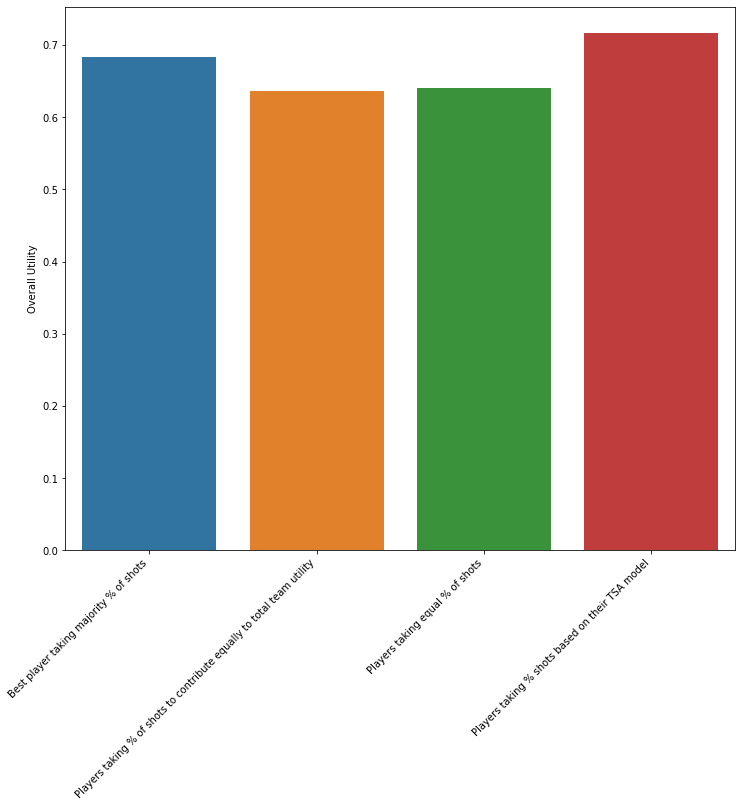

In [32]:
plt.figure(figsize=(12, 10))
chart = sns.barplot(x=name_of_model, y=utility_measure)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_ylabel('Overall Utility')
plt.show()